**Название проекта**

Покупательская активность.

**Описание проекта**

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе.

**Цель исследования**

Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Критерии исследования**

Решать задачу нужно в два этапа:

1. Разработать модель, которая предскажет вероятность снижения покупательской активности.

2. Выделить сегмент покупателей, проанализируйте его и предложите, как увеличить его покупательскую активность. Используйте данные моделирования, данные о прибыли покупателей и исходные данные (если понадобятся). По желанию вы можете проанализировать больше одного сегмента.
**Исходные данные**

Данные для работы находятся в нескольких таблицах.


**market_file.csv**


Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
* id — номер покупателя в корпоративной базе данных.
* Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
* Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
* Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
* Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
* Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
* Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
* Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
* Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
* Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
* Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
* Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
* Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**market_money.csv**


Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
* id — номер покупателя в корпоративной базе данных.
* Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
* Выручка — сумма выручки за период.


**market_time.csv**


Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
* id — номер покупателя в корпоративной базе данных.
* Период — название периода, во время которого зафиксировано общее время.
* минут — значение времени, проведённого на сайте, в минутах.


**money.csv**


Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
* id — номер покупателя в корпоративной базе данных.
* Прибыль — значение прибыли.



<a href="#qwerty">План исследования находится в меню Table of contents</a>

In [1]:
!pip install -U \
    scikit-learn==1.3.2 -q\
    imbalanced-learn==0.11.0 -q\
    shap -q\
    matplotlib -q\
    seaborn -q\
    pandas -q\
    numpy -q\
    phik -q


<a id="qwerty"></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Замена-названий-столбцов" data-toc-modified-id="Замена-названий-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Замена названий столбцов</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Объединение-таблиц" data-toc-modified-id="Объединение-таблиц-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Объединение таблиц</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li><li><span><a href="#Использование-пайплайнов" data-toc-modified-id="Использование-пайплайнов-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Использование пайплайнов</a></span></li><li><span><a href="#Анализ-важности-признаков" data-toc-modified-id="Анализ-важности-признаков-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Анализ важности признаков</a></span></li><li><span><a href="#Сегментация-покупателей" data-toc-modified-id="Сегментация-покупателей-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Сегментация покупателей</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

### Загрузка данных

In [2]:
import math
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os 
import requests

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    precision_score,
    recall_score,
    r2_score,
    roc_auc_score
)
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from phik.report import correlation_report, plot_correlation_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

In [3]:
def load_dataset(file_path, sep=',', decimal='.'):
    url = f'https://code.s3.yandex.net/datasets/{os.path.basename(file_path)}'
    
    if os.path.exists(file_path):
        return pd.read_csv(file_path, sep=sep, decimal=decimal)
    elif requests.get(url).status_code == 200:
        return pd.read_csv(url, sep=sep, decimal=decimal)
    else:
        print(f'Файл {file_path} не найден')
        return None

# Загрузка датасетов
market_file = load_dataset('/datasets/market_file.csv', decimal='.')
market_money = load_dataset('/datasets/market_money.csv', decimal='.')
market_time = load_dataset('/datasets/market_time.csv', decimal='.')
money = load_dataset('/datasets/money.csv', sep=';', decimal=',')

In [4]:
display(market_file.head())
market_file.info()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

Общий объем данных:

* В датасете 1300 строк (записей) и 13 столбцов (признаков).
* Пропуски отсутствуют.

Типы данных:

* Числовые признаки (int64, float64):
* id (уникальный идентификатор),
* Маркет_актив_6_мес (float),
* Маркет_актив_тек_мес, Длительность, Акционные_покупки, Средний_просмотр_категорий_за_визит, Неоплаченные_продукты_штук_квартал, Ошибка_сервиса, Страниц_за_визит (целочисленные значения).


(Категориальные/текстовые признаки (object):


* Покупательская активность, Тип сервиса, Разрешить сообщать, Популярная_категория (могут потребовать преобразования, например, в category или one-hot encoding).

Названия столбцов:

* Названия столбцов написаны в разном регистре. Их стоит привести к единому формату (нижний регистр).

Проблемы будут исправлены на этапе предобработки данных

In [5]:
display(market_money.head())
market_money.info()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


Общий объем данных:


* Датафрейм содержит 3 900 записей и 3 столбца.
* Пропущенных значений нет.


Типы данных и интерпретация столбцов:


* id (int64) 
* Период (object) 
* Выручка (float64) 

Названия столбцов:

* Названия столбцов написаны в разном регистре. Их стоит привести к единому формату (нижний регистр).

Проблемы будут исправлены на этапе предобработки данных

In [6]:
display(market_time.head())
market_time.info()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


Общий объем данных:


* Датафрейм содержит 2600 записей и 3 столбца
* Пропущенных значений нет


Типы данных и интерпретация столбцов:


* id (int64)
* Период (object)
* минут (int64)

Названия столбцов:

* Названия столбцов написаны в разном регистре. Их стоит привести к единому формату (нижний регистр).

Проблемы будут исправлены на этапе предобработки данных

In [7]:
display(money.head())
money.info()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Общий объем данных:


* Датафрейм содержит 1300 записей и 2 столбца
* Пропущенных значений нет 

Проблема с типом данных:
* Прибыль хранится как object (строка), хотя содержит числовые значения

Названия столбцов:

* Названия столбцов написаны в разном регистре. Их стоит привести к единому формату (нижний регистр).

Проблемы будут исправлены на этапе предобработки данных

**Данные успешно загружены, переходим к предобработке данных**

### Предобработка данных

#### Замена названий столбцов

In [8]:
market_file.columns = market_file.columns.str.lower()
market_file = market_file.rename(columns={
    'id': 'id',
    'покупательская активность': 'активность',
    'тип сервиса': 'сервис',
    'разрешить сообщать': 'рассылка',
    'маркет_актив_6_мес': 'актив_6мес',
    'маркет_актив_тек_мес': 'актив_текмес',
    'длительность': 'длит',
    'акционные_покупки': 'акц_покупки',
    'популярная_категория': 'категория',
    'средний_просмотр_категорий_за_визит': 'просмотры',
    'неоплаченные_продукты_штук_квартал': 'неоплата',
    'ошибка_сервиса': 'ошибки',
    'страниц_за_визит': 'страницы'
})
market_file.head()

,id,активность,сервис,рассылка,актив_6мес,актив_текмес,длит,акц_покупки,категория,просмотры,неоплата,ошибки,страницы
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [9]:
market_money.columns = market_money.columns.str.lower()
market_money.head()

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [10]:
market_time.columns = market_time.columns.str.lower()
market_time.head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [11]:
money.columns = money.columns.str.lower()
money.head()

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


**Названия столбцов приведены нижнему регистру**

#### Изменение типов данных

In [12]:
money['прибыль'] = money['прибыль'].astype(str).str.replace(',', '.').astype(float)
display(money.head())
money.info()

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


**Теперь у всех значений корректный тип данных**

#### Обработка дубликатов

Приведем строковые значения к нижнему регистру

In [13]:
str_col_names_market_file = ['активность', 'сервис', 'рассылка']
str_col_names_market_money = ['период']
str_col_names_market_time = ['период']

In [14]:
def lower(df, list_col):
    for elem in list_col:
        df[elem] = df[elem].str.lower()

In [15]:
lower(market_file, str_col_names_market_file)
lower(market_money, str_col_names_market_money)
lower(market_time, str_col_names_market_time)

**Теперь проверим наличие неявных дубликатов в датафреймах**

In [16]:
for elem in str_col_names_market_file:
    print(market_file[elem].value_counts())

активность
прежний уровень    802
снизилась          498
Name: count, dtype: int64
сервис
стандарт     914
премиум      376
стандартт     10
Name: count, dtype: int64
рассылка
да     962
нет    338
Name: count, dtype: int64


In [17]:
market_file['сервис'].replace('стандартт', 'стандарт', inplace=True)
market_file['сервис'].value_counts()

C:\Users\user\AppData\Local\Temp\ipykernel_19408\2999801374.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  market_file['сервис'].replace('стандартт', 'стандарт', inplace=True)


сервис
стандарт    924
премиум     376
Name: count, dtype: int64

In [18]:
for elem in str_col_names_market_money:
    print(market_money[elem].value_counts())

период
препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
Name: count, dtype: int64


In [19]:
for elem in str_col_names_market_time:
    print(market_time[elem].value_counts())

период
текущий_месяц       1300
предыдцщий_месяц    1300
Name: count, dtype: int64


In [20]:
market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц', inplace=True)
market_time['период'].value_counts()

C:\Users\user\AppData\Local\Temp\ipykernel_19408\4077268639.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц', inplace=True)


период
текущий_месяц       1300
предыдущий_месяц    1300
Name: count, dtype: int64

**Теперь проверим наличие явных дубликатов в датафреймах**

In [21]:
market_file.duplicated().sum()

0

In [22]:
market_money.duplicated().sum()

0

In [23]:
market_time.duplicated().sum()

0

In [24]:
money.duplicated().sum()

0

Явные дубликаты отсутствуют

**Вывод**

* названия столбцов приведены к нижнему регистру
* данные приведены к нужному типу
* неявные дубликаты устранены


### Исследовательский анализ данных

In [25]:
# Функция для построения графиков количественного признака
def grafics(df_col, label_x2, label_y2, title):
    # Создание фигуры и осей
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(title, fontsize=14, y=1.05)  # Общий заголовок
    # Гистограмма
    axs[0].hist(df_col,edgecolor='black', bins=30, alpha=0.7)
    axs[0].set_title('Гистограмма', fontsize=12)
    axs[0].set_xlabel(label_x2, fontsize=10)
    axs[0].set_ylabel(label_y2, fontsize=10)
    axs[0].grid(linestyle='--', alpha=0.5)
    # Диаграмма размаха
    sns.boxplot(
        x=df_col, 
        ax=axs[1], 
        color='lightgreen', 
        width=0.4,
        linewidth=1.5,
        flierprops=dict(
            marker='o', 
            markerfacecolor='red', 
            markersize=6,
            markeredgecolor='black'
        )
    )
    axs[1].set_title('Диаграмма размаха (Boxplot)', fontsize=12)
    axs[1].set_xlabel(label_x2, fontsize=10)
    
    
    plt.tight_layout()
    plt.show()

In [26]:
def plot_categorical_variables(data, x_column, hue_column=None, title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(6, 4))
    
    if hue_column:
        sns.countplot(data=data, x=x_column, hue=hue_column)
        if not title:
            plt.title(f'Распределение {x_column} по {hue_column}')
    else:
        sns.countplot(data=data, x=x_column)
        if not title:
            plt.title(f'Распределение {x_column}')
    
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    
    plt.tight_layout()
    plt.show()

**Изучим количественные признаки market_file**

In [27]:
num_col_names = market_file.select_dtypes(include='number').columns.tolist()
num_col_names

['id',
 'актив_6мес',
 'актив_текмес',
 'длит',
 'акц_покупки',
 'просмотры',
 'неоплата',
 'ошибки',
 'страницы']

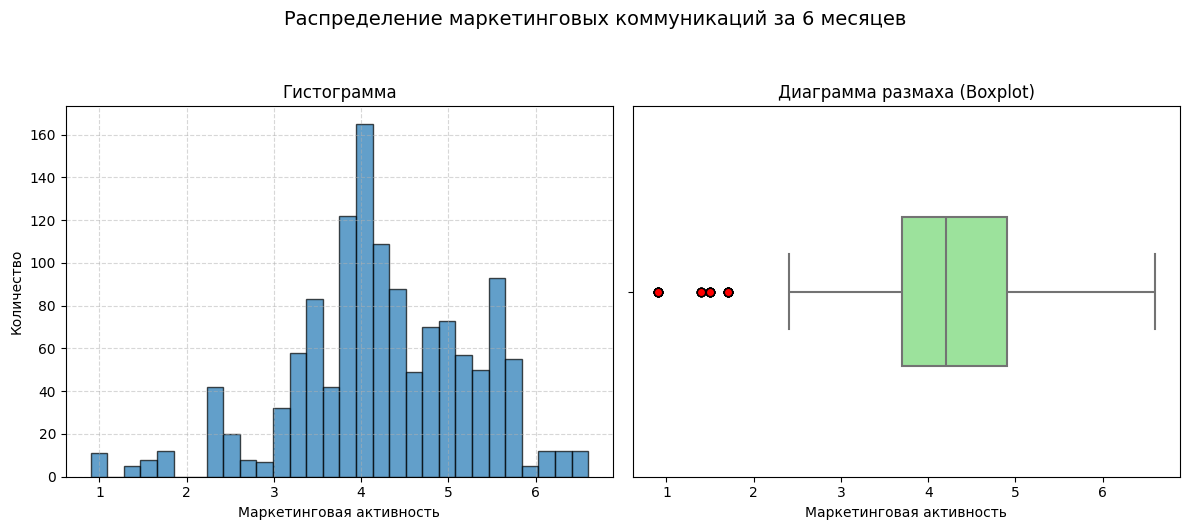

In [28]:
grafics(market_file['актив_6мес'], 'Маркетинговая активность', 'Количество', 
       'Распределение маркетинговых коммуникаций за 6 месяцев')

* Маркетинговая активность в основном находится в диапазоне 3–5.

* Присутствуют отдельные низкие значения, которые могут быть аномальными или представлять собой редкие случаи низкой активности.

* Распределение не является идеально симметричным.

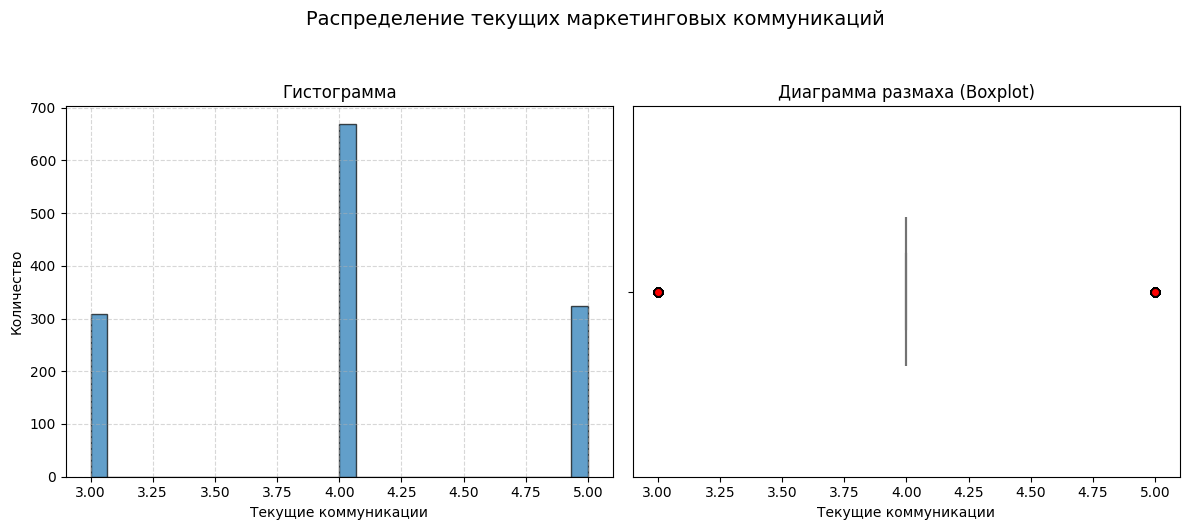

In [29]:
grafics(market_file['актив_текмес'], 'Текущие коммуникации', 'Количество', 
       'Распределение текущих маркетинговых коммуникаций')

Значения разбивается по группам. Преобразуем этот признак в категориальный. 

In [30]:
market_file['актив_текмес'] = market_file['актив_текмес'].map({
    3.0: 'низкое',
    4.0: 'среднее',
    5.0: 'высокое'
})

Изобразим этот признак, когда будем изучать категориальные признаки

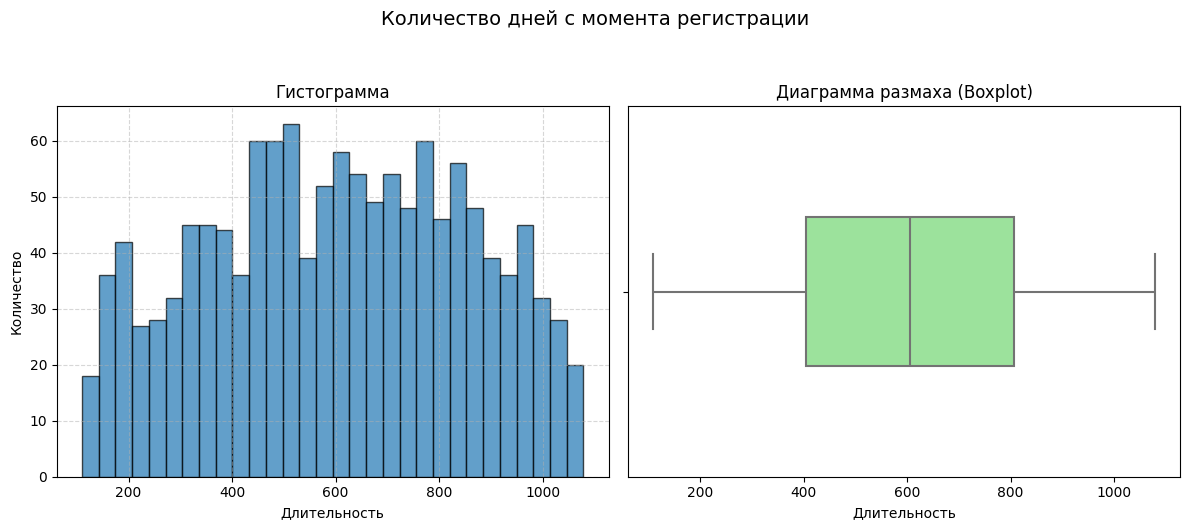

In [31]:
grafics(market_file['длит'], 'Длительность', 'Количество', 'Количество дней с момента регистрации')

* Распределение количества дней с момента регистрации довольно плотное и равномерное, без значительных выбросов.

* Половина пользователей зарегистрированы в интервале от ~400 до ~800 дней назад.

* Это говорит о устойчивом притоке пользователей в течение длительного времени.

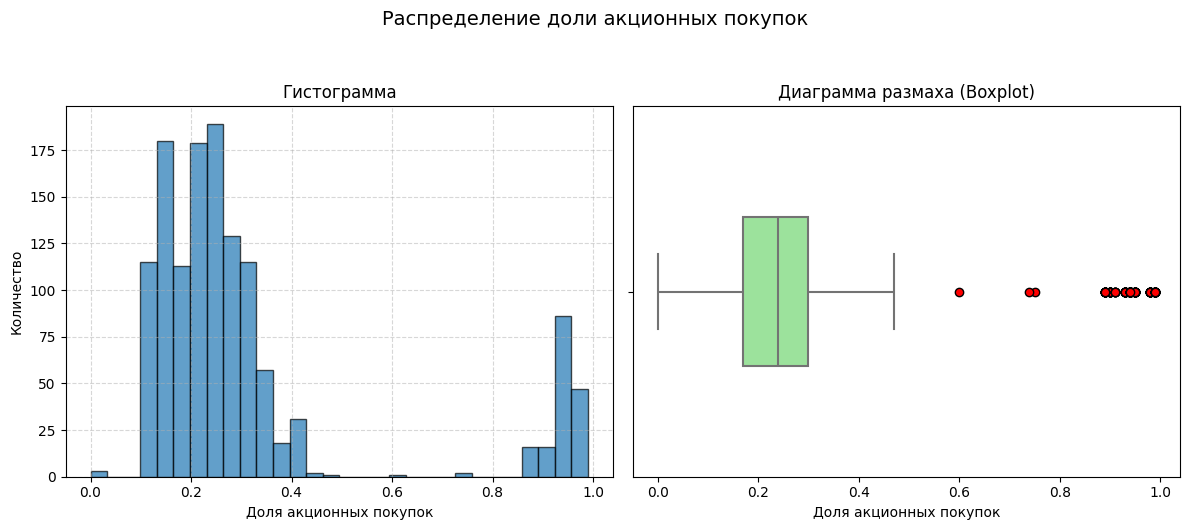

In [32]:
grafics(market_file['акц_покупки'], 'Доля акционных покупок', 'Количество', 
       'Распределение доли акционных покупок')

* Большинство пользователей совершают акционные покупки в умеренной доле (до 40%).

* Существует заметная группа, у которой доля акционных покупок крайне высока (до 100%)
* Распределение асимметрично, с длинным правым "хвостом".

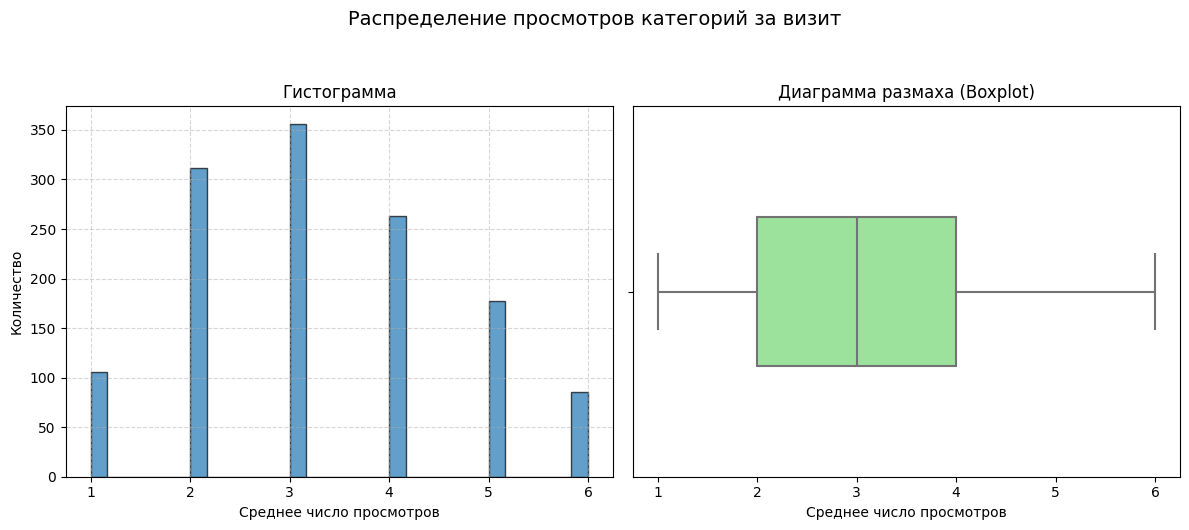

In [33]:
grafics(market_file['просмотры'], 'Среднее число просмотров', 'Количество', 
       'Распределение просмотров категорий за визит')

* Пользователи в среднем просматривают 2–4 категории за визит, чаще всего — 3.

* Распределение не имеет перекосов или выбросов.

* Это число — дискретное и категориализировать его, скорее всего, не нужно, так как оно уже удобно интерпретируется и может использоваться в модели как числовой признак.

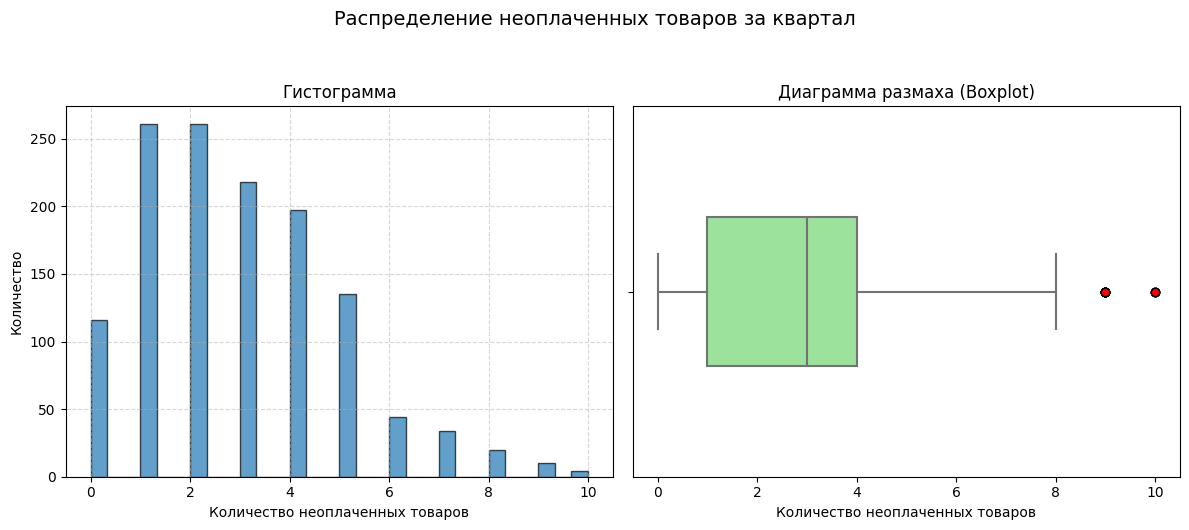

In [34]:
grafics(market_file['неоплата'], 'Количество неоплаченных товаров', 'Количество', 
       'Распределение неоплаченных товаров за квартал')

* Тип распределения: скошенное вправо, с длинным "хвостом" и отдельными выбросами.

* Большинство пользователей имеют от 0 до 5 неоплаченных товаров.

* Выбросы (9–10 товаров) есть, но их немного.

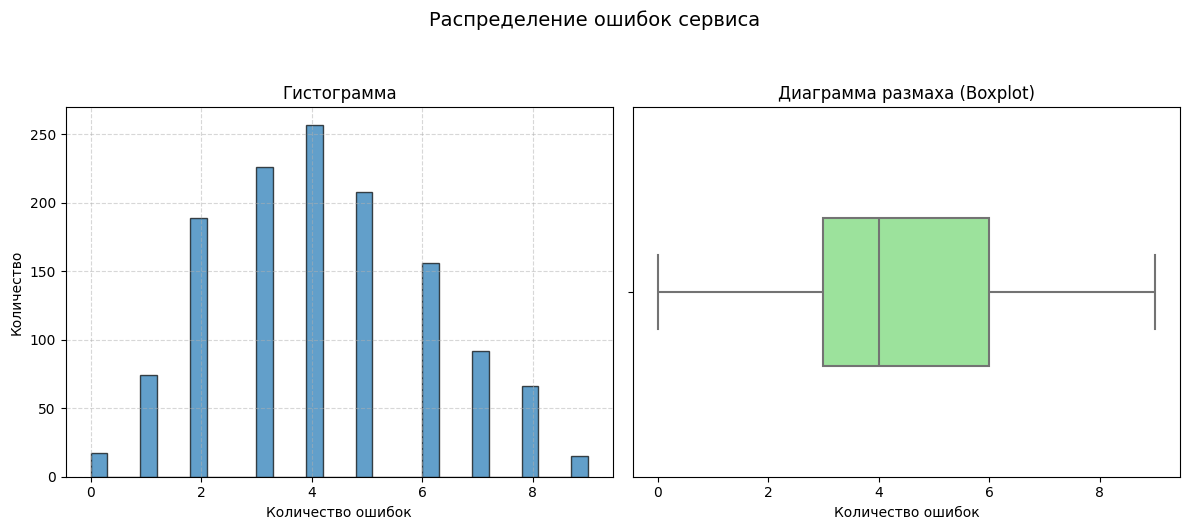

In [35]:
grafics(market_file['ошибки'], 'Количество ошибок', 'Количество', 
       'Распределение ошибок сервиса')

* Большая часть пользователей сталкиваются 3-5 ошибками

* Медианное значение составляет около 4 ошибок

* Распределение близко к нормальному

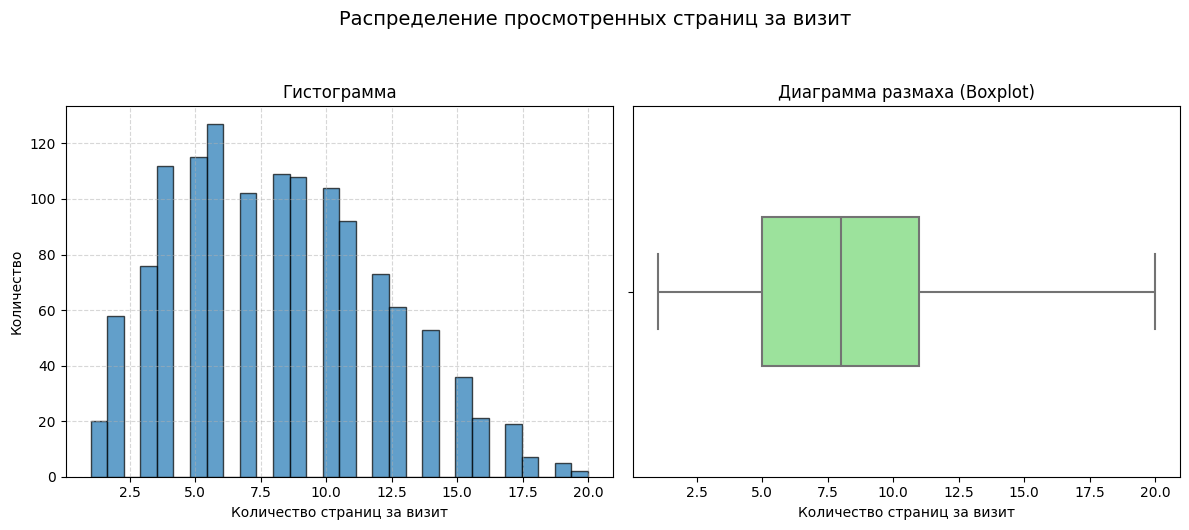

In [36]:
grafics(market_file['страницы'], 'Количество страниц за визит', 'Количество', 
       'Распределение просмотренных страниц за визит')

* В среднем пользователи просматривают 5-11 страниц за месяц

**Изучим категориальные признаки market_file**

In [37]:
cat_col_names = market_file.select_dtypes(exclude='number').columns.tolist()
cat_col_names

['активность', 'сервис', 'рассылка', 'актив_текмес', 'категория']

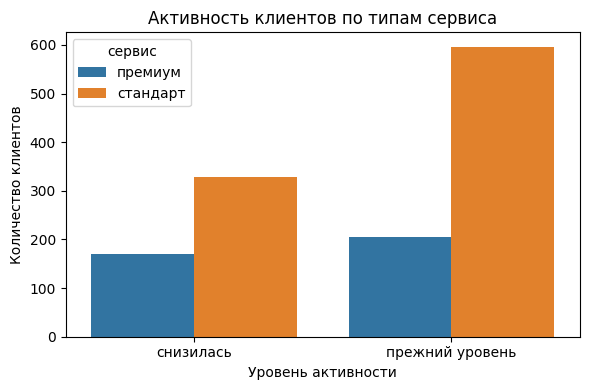

In [38]:
plot_categorical_variables(market_file,
                         x_column='активность',
                         hue_column='сервис',
                         title='Активность клиентов по типам сервиса',
                         xlabel='Уровень активности',
                         ylabel='Количество клиентов')

* Сервис "премиум" ассоциируется с более стабильной клиентской активностью.

* Возможно, стандартный сервис требует доработок для удержания клиентов.

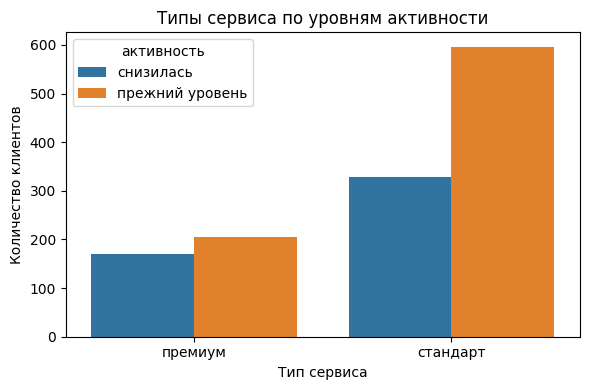

In [39]:
plot_categorical_variables(market_file,
                         x_column='сервис',
                         hue_column='активность',
                         title='Типы сервиса по уровням активности',
                         xlabel='Тип сервиса',
                         ylabel='Количество клиентов')

* Премиум-клиенты демонстрируют более устойчивую активность (меньше случаев снижения).

* Стандартные клиенты чаще снижают активность, что может указывать на:

* Потребность в дополнительных мерах удержания (персонализация, акции).

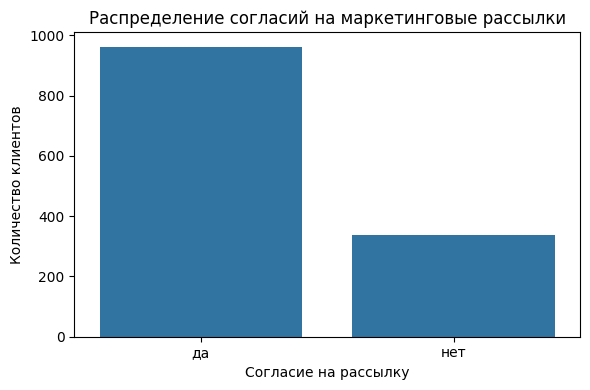

In [40]:
plot_categorical_variables(market_file,
                         x_column='рассылка',
                         title='Распределение согласий на маркетинговые рассылки',
                         xlabel='Согласие на рассылку',
                         ylabel='Количество клиентов')

* Большая база подписчиков позволяет активно использовать email- и SMS-рассылки.

* Важно соблюдать баланс, чтобы не вызвать раздражение.

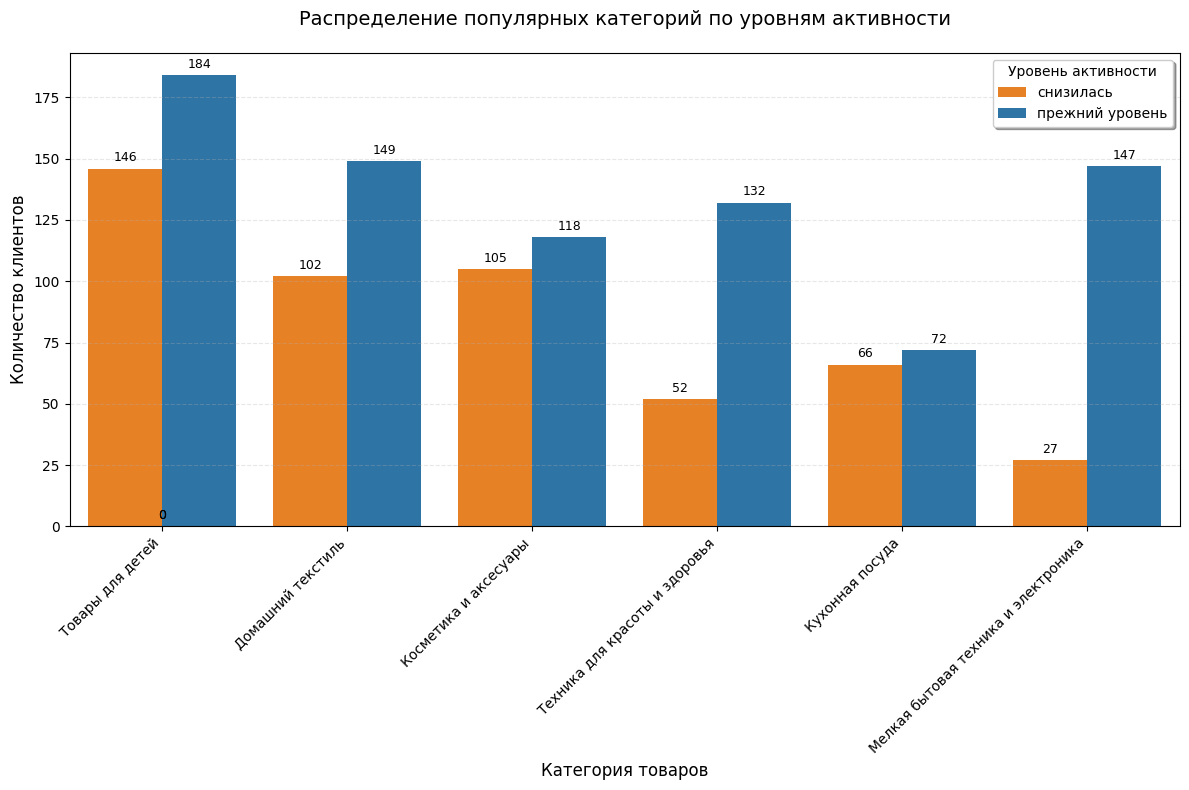

In [41]:
plt.figure(figsize=(12, 8))


ax = sns.countplot(data=market_file,
                  x='категория',
                  hue='активность',
                  palette={'снизилась': '#ff7f0e', 'прежний уровень': '#1f77b4'},
                  saturation=0.8)


plt.title('Распределение популярных категорий по уровням активности', 
          fontsize=14, pad=20)
plt.xlabel('Категория товаров', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            f'{int(height)}',
            ha='center',
            fontsize=9)

plt.legend(title='Уровень активности',
           loc='upper right',
           frameon=True,
           shadow=True)

ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()

plt.show()

"Товары для детей" и "Домашний текстиль" - основные источники активности

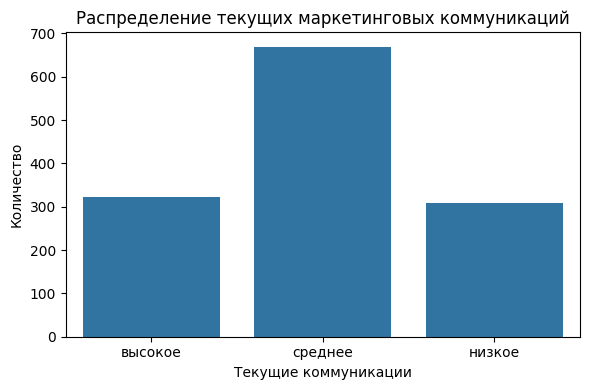

In [42]:
plot_categorical_variables(market_file,
                         x_column='актив_текмес',
                         title='Распределение текущих маркетинговых коммуникаций',
                         xlabel='Текущие коммуникации',
                         ylabel='Количество')

In [43]:
market_file['актив_текмес']

0       высокое
1       среднее
2        низкое
3       высокое
4        низкое
         ...   
1295     низкое
1296    среднее
1297     низкое
1298    высокое
1299    высокое
Name: актив_текмес, Length: 1300, dtype: object

**Изучим количественные признаки market_money**

In [44]:
num_col_names = market_money.select_dtypes(include='number').columns.tolist()
num_col_names

['id', 'выручка']

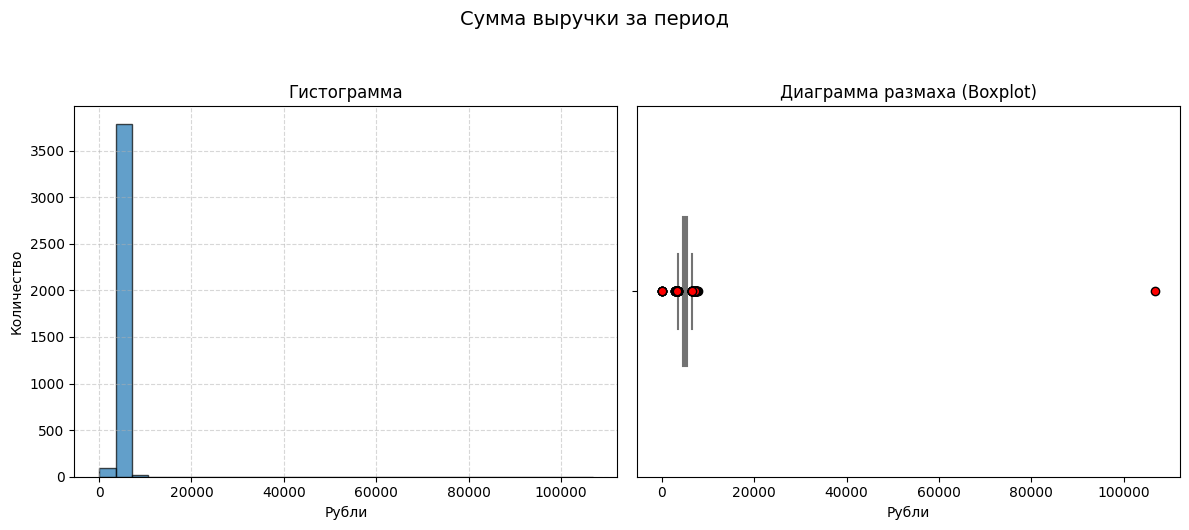

In [45]:
grafics(market_money['выручка'], 'Рубли', 'Количество', 
       'Сумма выручки за период')

In [46]:
market_money['выручка'].describe()

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64

In [47]:
market_money[market_money['выручка'] >15000]

,id,период,выручка
98,215380,текущий_месяц,106862.2


В данных имеется один выброс, удалим его

In [48]:
market_money.drop(market_money[market_money['выручка'] == market_money['выручка'].max()].index, inplace=True)

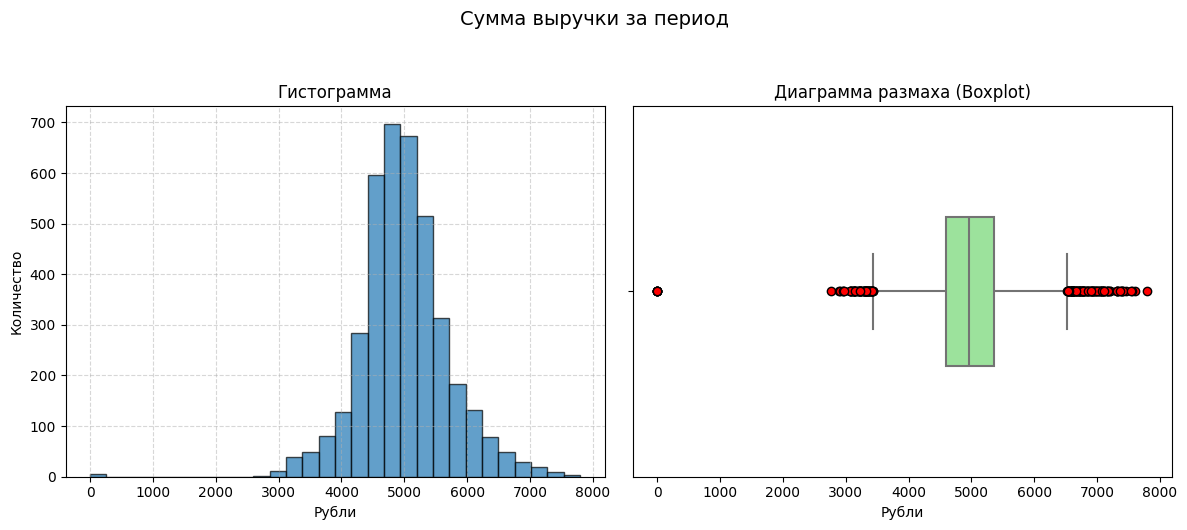

In [49]:
grafics(market_money['выручка'], 'Рубли', 'Количество', 
       'Сумма выручки за период')

* В среднем выручка составляет 3500-5500р
* Распределение близко к нормальному

**Изучим категориальные признаки market_money**

In [50]:
cat_col_names = market_money.select_dtypes(exclude='number').columns.tolist()
cat_col_names

['период']

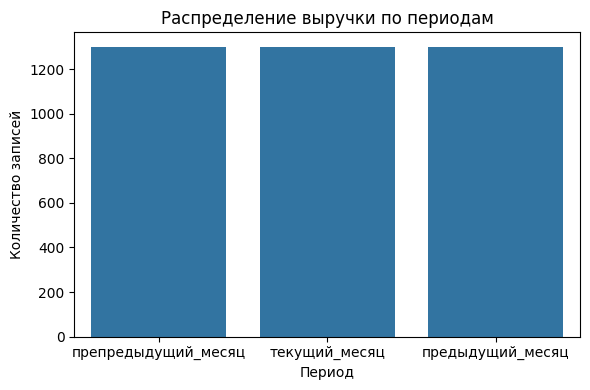

In [51]:
plot_categorical_variables(market_money,
                         x_column='период',
                         title='Распределение выручки по периодам',
                         xlabel='Период',
                         ylabel='Количество записей')

**Изучим количественные признаки market_time**

In [52]:
num_col_names = market_time.select_dtypes(include='number').columns.tolist()
num_col_names

['id', 'минут']

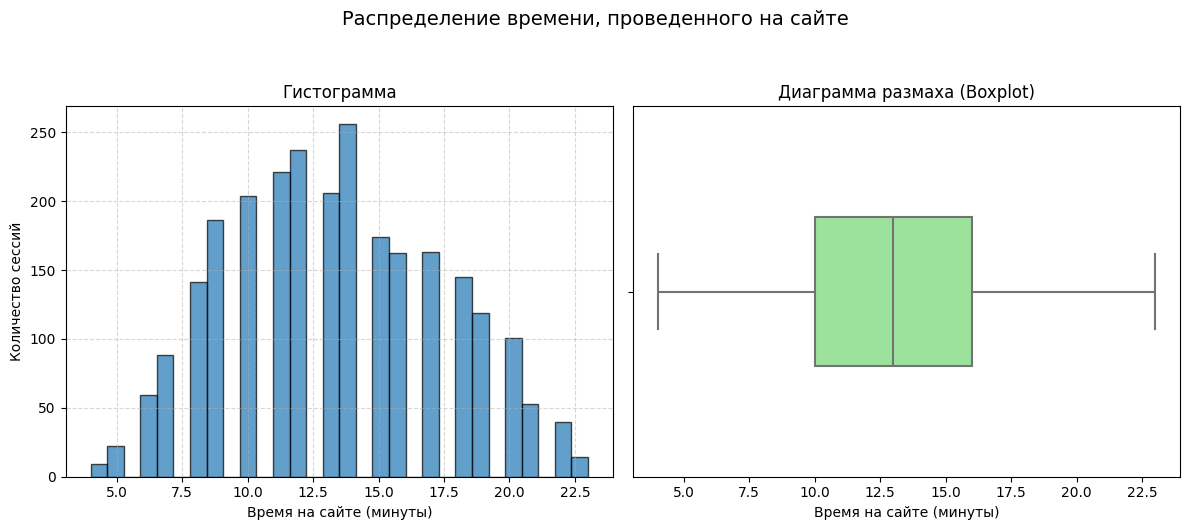

In [53]:
grafics(
    market_time['минут'],
    'Время на сайте (минуты)',
    'Количество сессий',
    'Распределение времени, проведенного на сайте'
)

* В среднем пользователи проводят на сайте 10-17 минут
* Распределение близко к нормальному

**Изучим категориальные признаки market_time**

In [54]:
cat_col_names = market_time.select_dtypes(exclude='number').columns.tolist()
cat_col_names

['период']

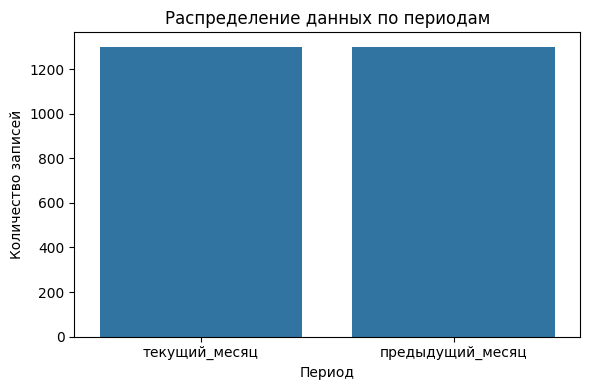

In [55]:
plot_categorical_variables(
    market_time,
    x_column='период',
    title='Распределение данных по периодам',
    xlabel='Период',
    ylabel='Количество записей'
)

**Изучим количественные признаки money**

In [56]:
num_col_names = money.select_dtypes(include='number').columns.tolist()
num_col_names

['id', 'прибыль']

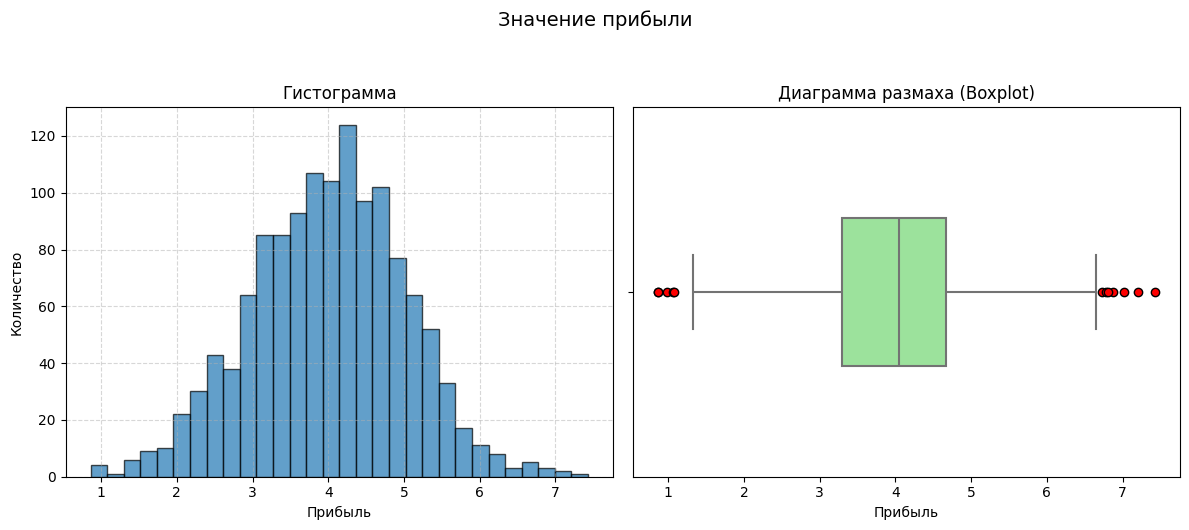

In [57]:
grafics(money['прибыль'], 'Прибыль', 'Количество', 
       'Значение прибыли')

Cредняя прибыль 3-5. Распределение близко к нормальному

**Отберем клиентов с покупательской активностью не менее трёх месяцев**

In [58]:
market_money.head()

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


Выполним фильтрацию клиентов (id), оставляя только тех, у кого во всех записях значение выручки строго больше нуля

In [59]:
df = market_money.groupby('id').filter(lambda group: (group['выручка'] > 0).all())

In [60]:
df['выручка'].describe()

count    3890.000000
mean     5007.541902
std       679.235737
min      2758.700000
25%      4592.000000
50%      4959.000000
75%      5363.000000
max      7799.400000
Name: выручка, dtype: float64

Теперь в таблице отсутствуют пользователи, у которых есть хотя бы один 0 в столбце 'выручка'. Теперь посмотрим, на сколько пользователей уменьшилась таблица

In [61]:
market_money.shape

(3899, 3)

In [62]:
df.shape

(3890, 3)

1)3899-3890=9, 

2)9:3=3. 

3 пользователя было удалено

Присвоим значение df датафрейму market_money

In [63]:
market_money = df
market_money.shape

(3890, 3)

**Вывод**


* Количественный признак 'актив_текмес' был заменен на категориальный со значениями: 'Низкое кол_во', 'Среднее кол_во', 'Высокое кол_во'.

* Были удалены пользователи, история активности которых не насчитывает трех месяцев.



### Объединение таблиц

Теперь объединим таблицы market_file.csv, market_money.csv, market_time.csv. 

**Преобразуем market_money так, чтобы каждый период стал столбцом**

In [64]:
money_pivot = market_money.pivot(
    index='id', 
    columns='период', 
    values='выручка'
).reset_index()

money_pivot.columns = ['id'] + [f'выручка_{period}' for period in money_pivot.columns[1:]]

money_pivot.head()

,id,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
0,215349,5216.0,4472.0,4971.6
1,215350,5457.5,4826.0,5058.4
2,215351,6158.0,4793.0,6610.4
3,215352,5807.5,4594.0,5872.5
4,215353,4738.5,5124.0,5388.5


**Преобразуем market_time так, чтобы каждый период стал столбцом**

In [65]:
time_pivot = market_time.pivot(
    index='id', 
    columns='период', 
    values='минут' 
).reset_index()

time_pivot.columns = ['id'] + [f'время_{period}' for period in time_pivot.columns[1:]]

time_pivot.head()

,id,время_предыдущий_месяц,время_текущий_месяц
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11


**Теперь соберем все 3 таблицы в одну**

In [66]:
final_data = market_file.merge(
    money_pivot, 
    on='id', 
    how='left'
).merge(
    time_pivot, 
    on='id', 
    how='left'
)

final_data.head()

,id,активность,сервис,рассылка,актив_6мес,актив_текмес,длит,акц_покупки,категория,просмотры,неоплата,ошибки,страницы,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц
0,215348,снизилась,премиум,да,3.4,высокое,121,0.00,Товары для детей,6,2,1,5,NaN,NaN,NaN,13,14
1,215349,снизилась,премиум,да,4.4,среднее,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,снизилась,стандарт,нет,4.9,низкое,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,снизилась,стандарт,да,3.2,высокое,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,снизилась,стандарт,нет,5.1,низкое,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11


In [67]:
display(money_pivot.shape)
display(time_pivot.shape)
display(market_file.shape)
final_data.shape

(1297, 4)

(1300, 3)

(1300, 13)

(1300, 18)

In [68]:
final_data.isna().sum()

id                             0
активность                     0
сервис                         0
рассылка                       0
актив_6мес                     0
актив_текмес                   0
длит                           0
акц_покупки                    0
категория                      0
просмотры                      0
неоплата                       0
ошибки                         0
страницы                       0
выручка_предыдущий_месяц       3
выручка_препредыдущий_месяц    3
выручка_текущий_месяц          4
время_предыдущий_месяц         0
время_текущий_месяц            0
dtype: int64

In [69]:
final_data = final_data.dropna()
final_data.shape

(1296, 18)

**Вывод**

Был создан датасет final_data для дальнейшего моделирования, состоящий из активных пользователей

### Корреляционный анализ

In [70]:
# сделаем столбец 'id' индексом датафрейма final_data
final_data.set_index('id', inplace=True)

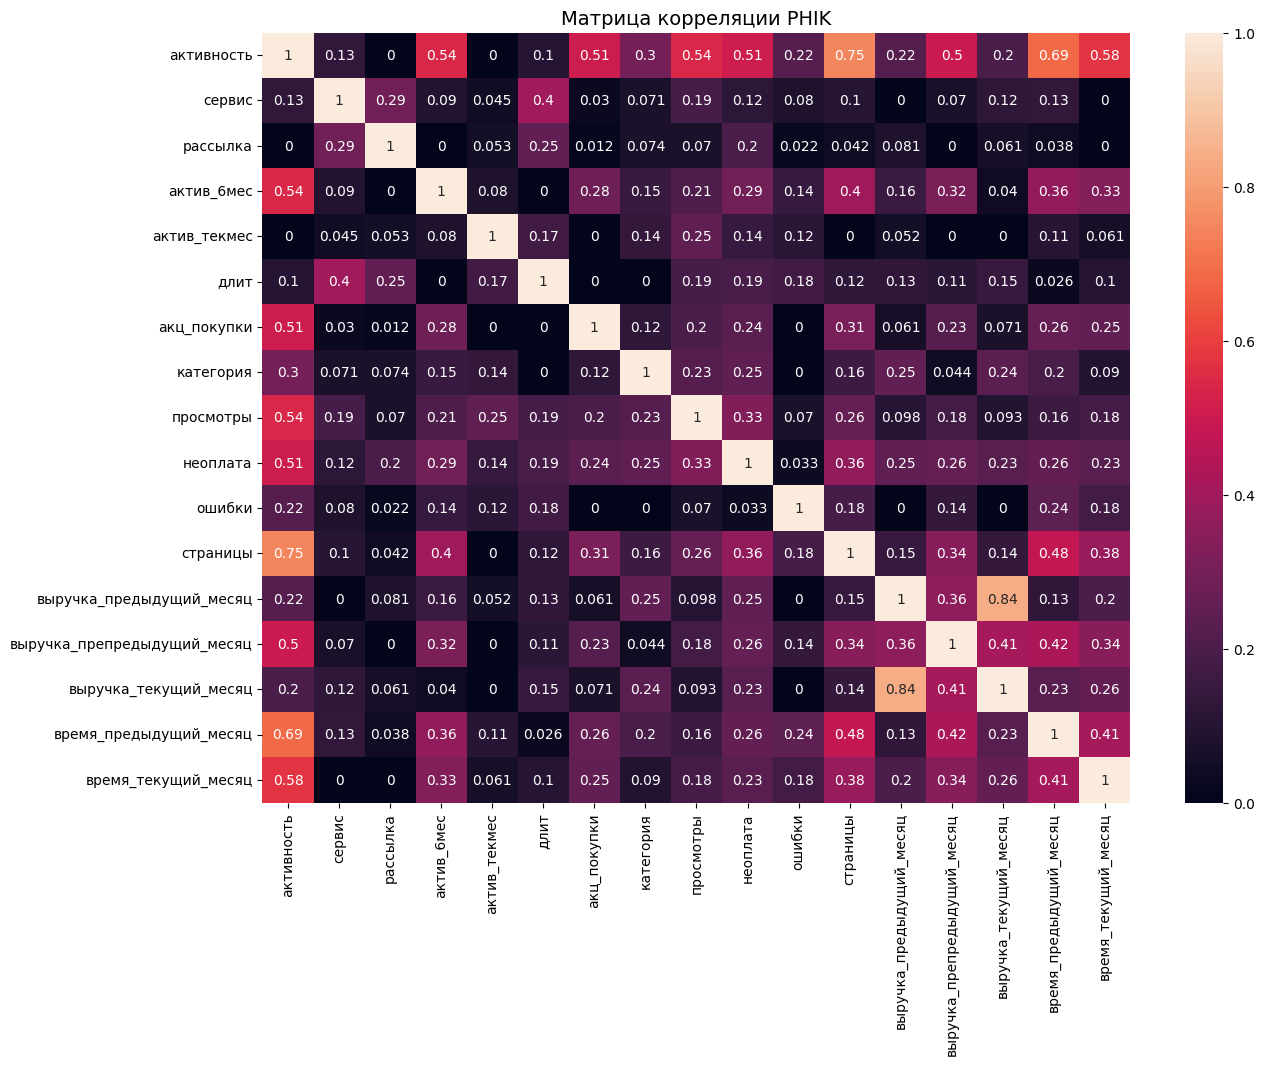

In [71]:
interval_cols = final_data.select_dtypes('number').columns.tolist()
phik_overview = final_data.phik_matrix(interval_cols=interval_cols)

plt.figure(figsize=(14,10))
sns.heatmap(phik_overview,  annot=True)
plt.title('Матрица корреляции PHIK', fontsize=14)
plt.show()

</span><br><span style="color: purple; font-weight: bold">Мультиколлинеарность отсутствует</span>

Также удалим столбцы 'рассылка', 'длит', 'сервис' так как у них маленькая корреляция с целевым признаком 'активность'

In [72]:
# columns_to_del = ['выручка_текущий_месяц', 'рассылка', 'длит', 'сервис' ]

In [73]:
columns_to_del = ['рассылка', 'длит', 'сервис' ]

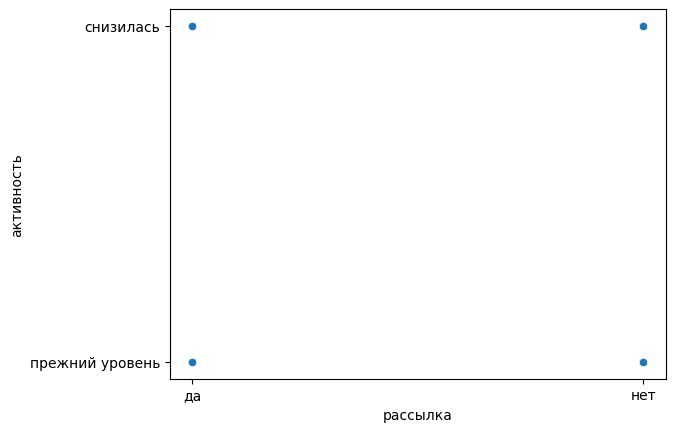

In [74]:
sns.scatterplot(data=final_data, x="рассылка", y="активность");

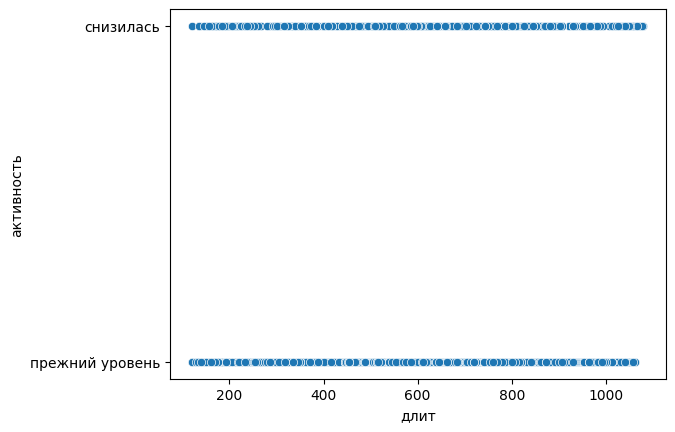

In [75]:
sns.scatterplot(data=final_data, x="длит", y="активность");

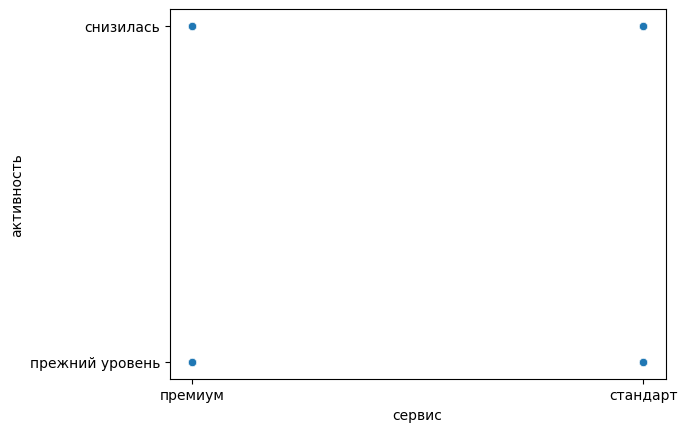

In [76]:
sns.scatterplot(data=final_data, x="сервис", y="активность");

Удалим столбцы

In [77]:
final_data = final_data.drop(columns_to_del, axis=1)
final_data.head()

,активность,актив_6мес,актив_текмес,акц_покупки,категория,просмотры,неоплата,ошибки,страницы,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц
id,,,,,,,,,,,,,,
215349,снизилась,4.4,среднее,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
215350,снизилась,4.9,низкое,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
215351,снизилась,3.2,высокое,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
215352,снизилась,5.1,низкое,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
215353,снизилась,3.3,среднее,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


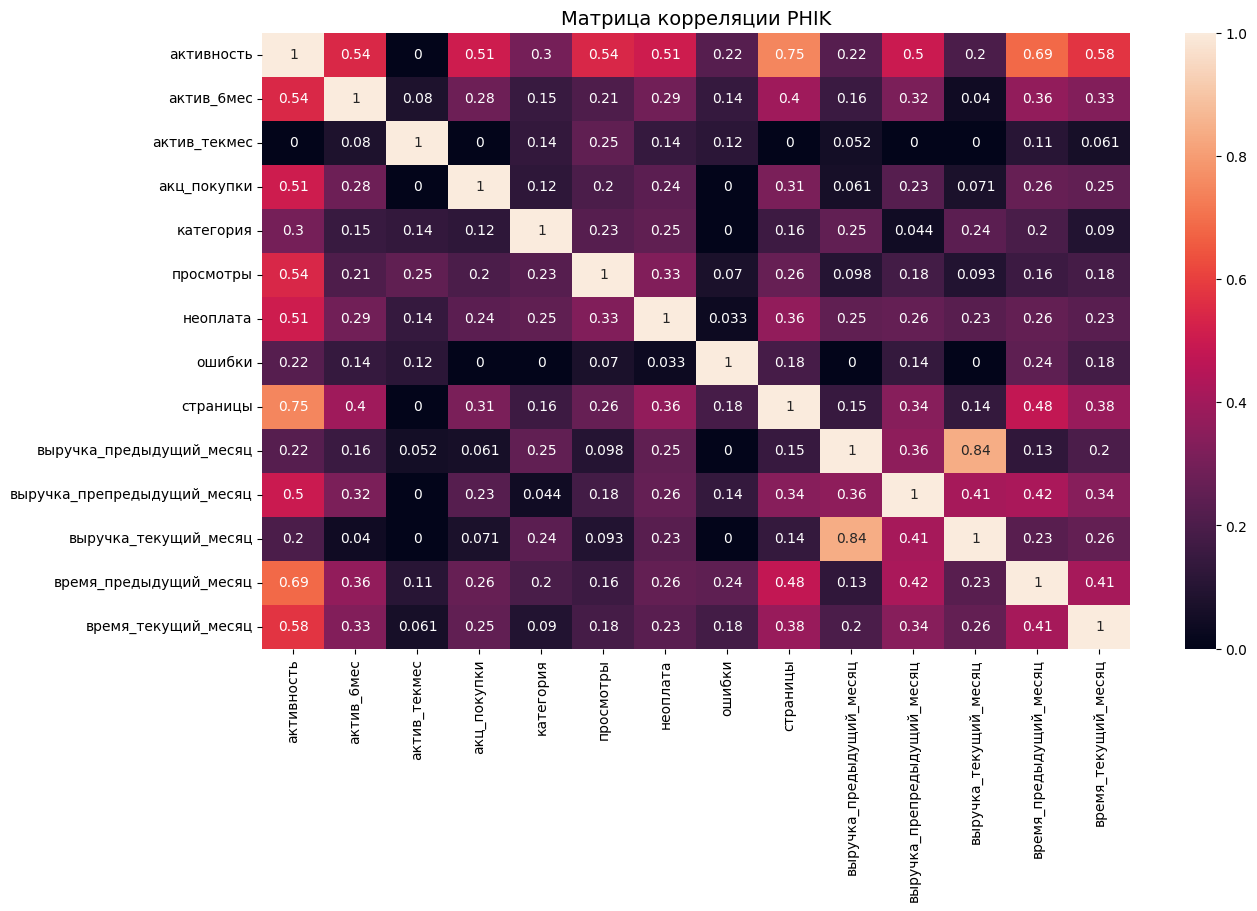

In [78]:
interval_cols = final_data.select_dtypes('number').columns.tolist()
phik_overview = final_data.phik_matrix(interval_cols=interval_cols)

plt.figure(figsize=(14,8))
sns.heatmap(phik_overview,  annot=True)
plt.title('Матрица корреляции PHIK', fontsize=14)
plt.show()

**Вывод**

* Была устранена мультиколлинеарность удланием столбца 'выручка_текущий_месяц'
* Были удалены столбцы, не коррелирующие с целевым признаком 'активность': 'рассылка', 'актив_текмес', 'длит', 'сервис'

### Использование пайплайнов

В этом разделе будут рассмотрены следующие модели для задачи классификации:


* Метод K ближайших соседей
* Модель дерева решений
* Модель логистической регрессии
* Метод опороных векторов

Подготовку данных осуществим с помощью пайплайна:

* разобьем данные на тренировочную и тестовую выборки;
* разобьем данные на количественные и категориальные, категориальные данные будем кодировать через OneHotEncoder и OrdinalEncoder. Количественные признаки будем масшабировать через StandardScaler и MinMaxScaler;


Разделим данные на выборки

In [79]:
X = final_data.drop('активность', axis=1)
y = final_data['активность']
    
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=42)

display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
y_test.shape

(972, 13)

(324, 13)

(972,)

(324,)

Посмотрим на распределение целевого признака 

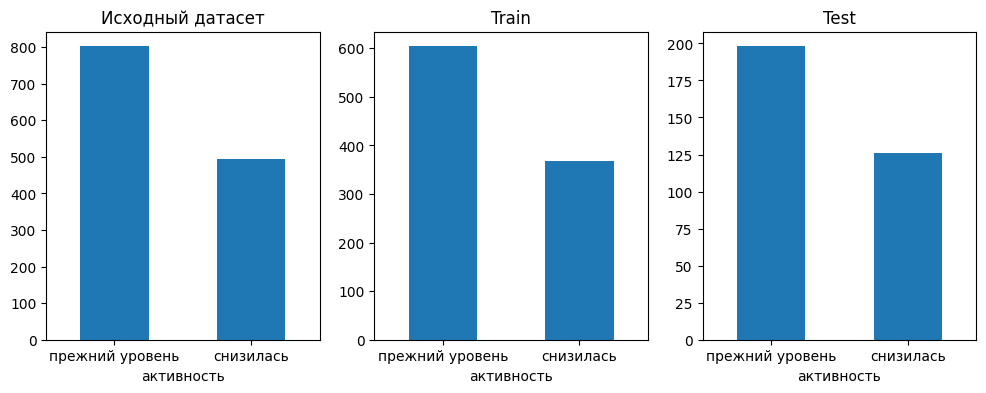

In [80]:
# визуализация баланса целевого признака в выборках
fig, ax = plt.subplots(1,3, figsize=(12,4))
y.value_counts().plot(kind='bar', ax=ax[0], rot=0)
ax[0].set_title("Исходный датасет")
y_train.value_counts().plot(kind='bar', ax=ax[1], rot=0)
ax[1].set_title("Train")
y_test.value_counts().plot(kind='bar', ax=ax[2], rot=0)
ax[2].set_title("Test")
plt.show()

Наблюдается дисбаланс классов. Будем использовать стратифицированные выборки

In [81]:
X = final_data.drop('активность', axis=1)
y = final_data['активность']
    
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=42,
    stratify=y)

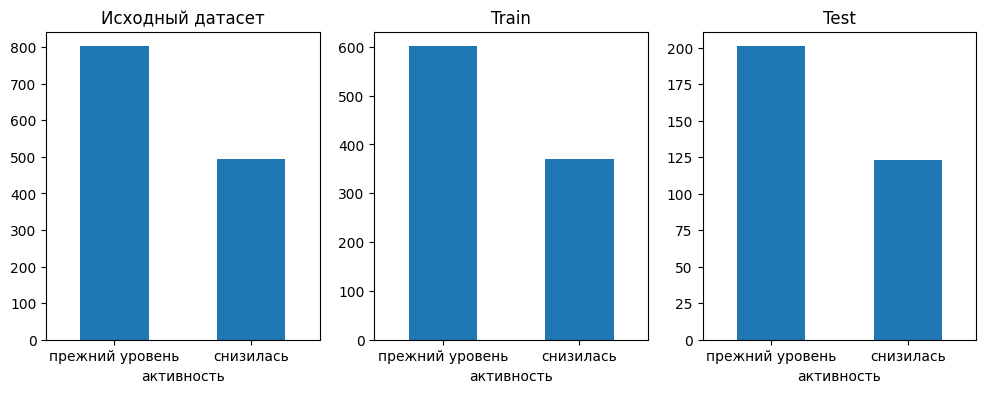

In [82]:
# визуализация баланса целевого признака в выборках
fig, ax = plt.subplots(1,3, figsize=(12,4))
y.value_counts().plot(kind='bar', ax=ax[0], rot=0)
ax[0].set_title("Исходный датасет")
y_train.value_counts().plot(kind='bar', ax=ax[1], rot=0)
ax[1].set_title("Train")
y_test.value_counts().plot(kind='bar', ax=ax[2], rot=0)
ax[2].set_title("Test")
plt.show()

In [83]:
import sklearn
sklearn.__version__

'1.3.2'

In [84]:
final_data.head()

,активность,актив_6мес,актив_текмес,акц_покупки,категория,просмотры,неоплата,ошибки,страницы,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц
id,,,,,,,,,,,,,,
215349,снизилась,4.4,среднее,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
215350,снизилась,4.9,низкое,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
215351,снизилась,3.2,высокое,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
215352,снизилась,5.1,низкое,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
215353,снизилась,3.3,среднее,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


**Пайплайн для подготовки данных**

In [85]:
# создаём списки с названиями признаков
ohe_columns = ['категория']
ord_columns = ['актив_текмес']
num_columns = final_data.select_dtypes(include='number').columns.tolist()

In [86]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

In [87]:
# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['низкое', 'среднее', 'высокое'], 
                  
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [88]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

**Итоговый пайплайн**

In [89]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=42))
])


В рамках проекта необходимо построить модель, которая будет предсказывать вероятность снижения покупательской активности постоянных клиентов в ближайшие три месяца. Основная цель — заблаговременно выявить клиентов с высоким риском снижения активности и предложить им персонализированные предложения для удержания.

Для оценки качества модели выберем метрику ROC AUC 

Модель в проекте должна не просто классифицировать клиентов на два класса ("снизилась активность" / "прежний уровень"), а предсказывать вероятность снижения активности. ROC AUC как раз измеряет, насколько хорошо модель различает два класса по предсказанным вероятностям, независимо от конкретного порога отсечения.

**Словарь для перебора моделей и гиперпараметров**

In [90]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=42)],
        'models__max_depth': range(2,10),
        'models__max_features': range(2,10),
        'models__min_samples_leaf': range(2,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # 3. LogisticRegression 
    {
        'models': [LogisticRegression(random_state=42, solver='liblinear')],
        'models__penalty': ['l1', 'l2'],
        'models__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'models__class_weight': [None, 'balanced'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=42, probability= True)],
        'models__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'models__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    },
]

In [91]:
from sklearn.model_selection import RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = randomized_search.predict_proba(X_test)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                      

**Лучшая модель - LogisticRegression(C=1000, class_weight='balanced', penalty='l1', random_state=42, solver='liblinear')**

### Анализ важности признаков

Извлечем пайплайн для подготовки данных, затеим преобразуем X_train и X_test

In [92]:
best_model = randomized_search.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_...
                                                  ['актив_текмес']),
                                                 ('num', StandardScaler(),
                                                  ['актив_6мес', 'акц_покупки',
                                                   'просмотры', 'неоплата',
                                                   'ошибки', 'страницы',
                                                   'выручка_предыдущий_месяц',
                                                   'выручка_препредыдущий_месяц',
                                                   'выручка_текущий_месяц',
                                                   'время_предыдущий_месяц',
                                                   'время_текущий_месяц'])])),
                ('models',
                 LogisticRegression(C=1000, class_weight='balanced',
                                    penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [93]:
preprocessor = best_model['preprocessor']
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

Обучим лучшую модель на тренировочных данных

In [94]:
#model = LogisticRegression(C=1000, class_weight='balanced', penalty='l1', random_state=42, solver='liblinear')
#model.fit(X_train_processed, y_train)

In [95]:
model = randomized_search.best_estimator_.named_steps['models']
model.fit(X_train_processed, y_train)

LogisticRegression(C=1000, class_weight='balanced', penalty='l1',
                   random_state=42, solver='liblinear')

In [96]:
coefficients = model.coef_[0]
coefficients

array([-0.24447492, -0.37187058, -1.2507247 , -0.65041117, -0.3265428 ,
        0.06455598, -0.44178432,  0.67004333, -0.65949427,  0.53242265,
       -0.12167119, -0.59686454,  0.31078215, -0.27089672, -0.26835486,
       -0.55696663, -0.44690065])

<Figure size 1000x700 with 0 Axes>

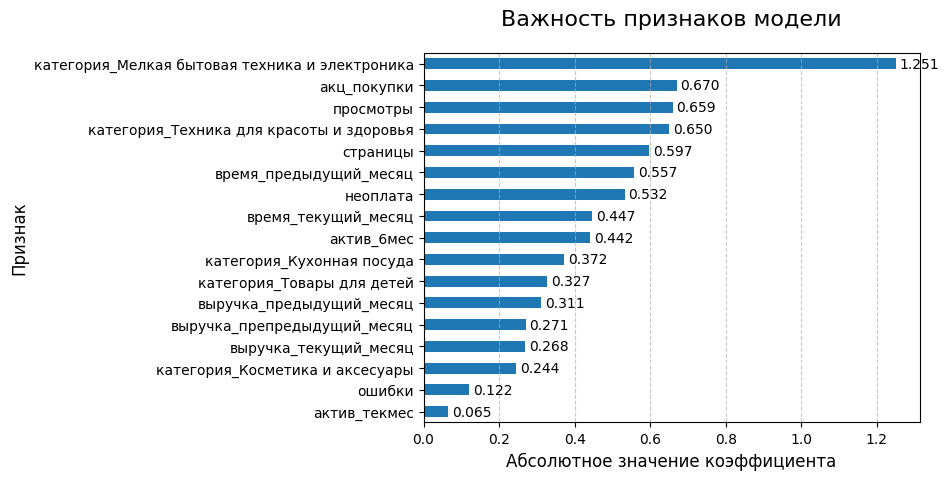

In [97]:
feature_names = (
    list(preprocessor.named_transformers_['ohe']
         .named_steps['ohe']
         .get_feature_names_out(ohe_columns))  # OHE-признаки
    + ord_columns                              # порядковые признаки
    + num_columns                              # числовые признаки
)

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)
})


feature_importance = feature_importance.sort_values('Importance', ascending=True)


plt.figure(figsize=(10, 7))
ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', legend=False)


plt.title('Важность признаков модели', pad=20, fontsize=16)
plt.xlabel('Абсолютное значение коэффициента', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(feature_importance['Importance']):
    ax.text(v + 0.01, i, f"{v:.3f}", color='black', va='center')

plt.show()

Наибольшую значимость имеют следующие признаки:

**Категория покупок: мелкая бытовая техника и электроника**
* Этот признак обладает наибольшим вкладом в модель. Это может свидетельствовать о том, что покупатели данной категории особенно чувствительны к изменениям в ассортименте, ценах или внешних условиях.

**Акционные покупки**
* Высокая значимость акционных покупок говорит о том, что клиенты, активно реагирующие на акции, могут быстрее снижать активность, если акции перестают удовлетворять их ожидания.

**Категория: техника для красоты и здоровья**
* Указывает на важность продуктовой направленности покупок: снижение интереса к определённым категориям может сигнализировать о падении вовлечённости клиента.

**Поведение на сайте: количество просмотров и страниц**
* Эти цифровые признаки показывают интерес клиента к сайту и вовлечённость. Снижение этих метрик может быть ранним индикатором снижения активности.

**Время, проведённое на сайте в предыдущем месяце и неоплата заказов**
* Эти поведенческие факторы также значительно влияют на прогноз. Снижение времени на сайте и рост неоплаченных заказов могут сигнализировать о потере интереса или неудовлетворённости клиента.


**Анализ SHAP-значений**

In [98]:
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names)

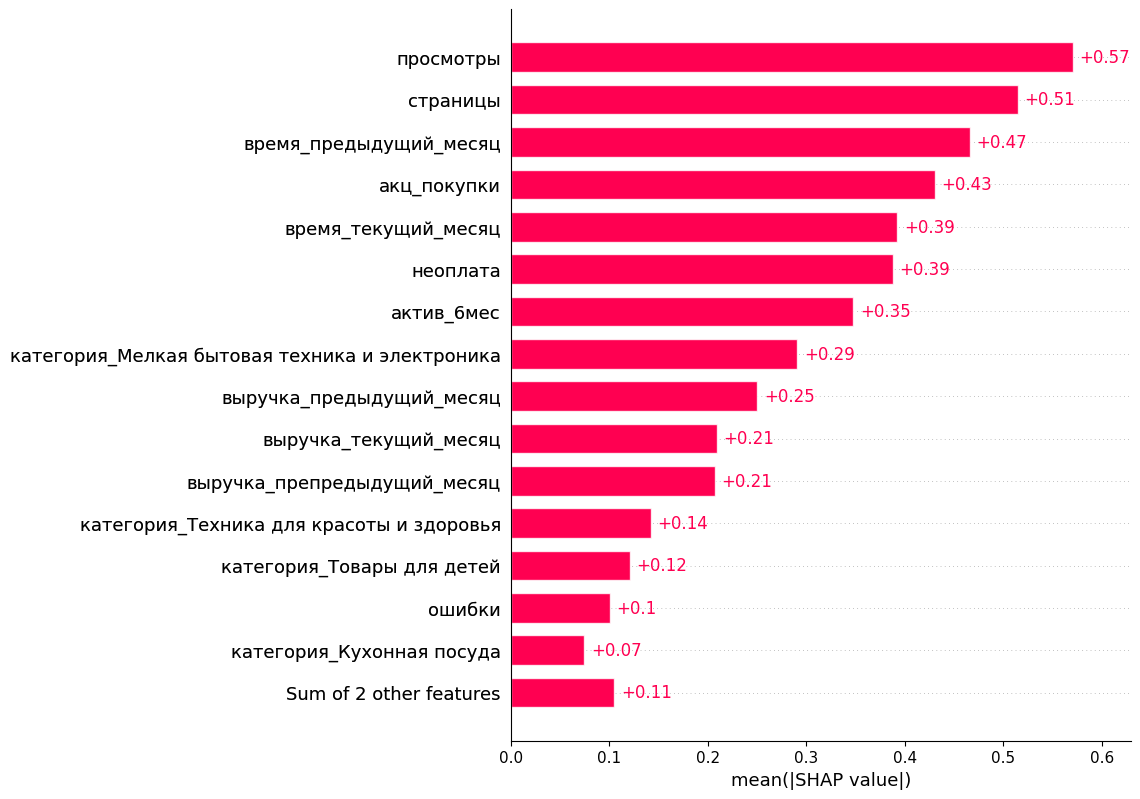

In [99]:
explainer = shap.LinearExplainer(model, X_train_df)
shap_values = explainer(X_test_df)
shap.plots.bar(shap_values, max_display=16) 

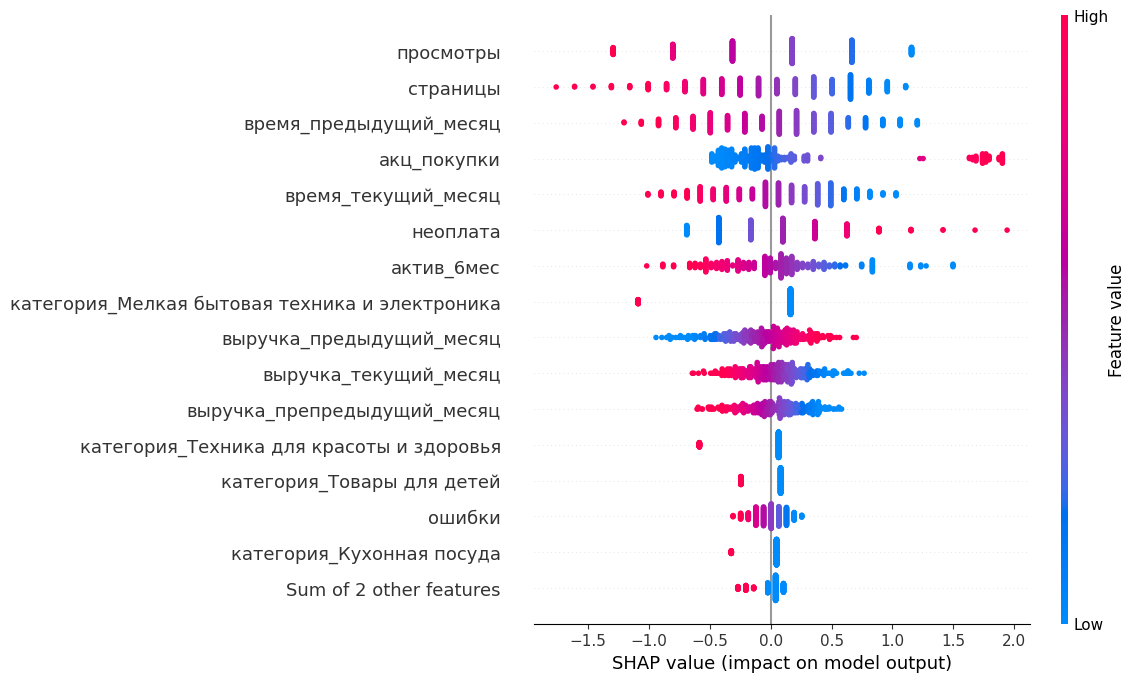

In [100]:
shap.plots.beeswarm(shap_values, max_display=16) 

Можно сделать выводы:

Наиболее важные признаки:

* просмотры  — самый значимый признак. Большее количество просмотров сильно повышает вероятность положительного исхода модели.

* страницы  — количество просмотренных страниц также сильно влияет на предсказание.

* время_предыдущий_месяц  и акц_покупки  — высокая активность в прошлом месяце и участие в акциях указывают на высокую заинтересованность пользователя.

* неоплата  — наличие неоплаты также вносит существенный вклад.

Менее значимые, но всё же влияющие признаки:

* время_текущий_месяц , актив_6мес, и категория мелкой бытовой техники и электроники  — отражают текущую активность и интерес к определённой категории товаров.

* Признаки, связанные с выручкой и категориями товаров (например, косметика, детские товары, кухонная посуда) имеют меньший вклад, но также учитываются моделью.

Наименее значимые:

* выручка_предыдущий_месяц  и актив_текмес — практически не влияют на итоговое решение модели.

Модель сильнее всего реагирует на поведенческие признаки (просмотры, страницы, активность) и в меньшей степени — на категориальные или финансовые показатели. Это указывает на то, что поведение пользователя (его вовлеченность) — ключевой фактор для предсказания целевого события.

### Сегментация покупателей

In [101]:
df = final_data.join(money.set_index('id'), how='left')

In [102]:
df.shape

(1296, 15)

In [103]:
df.head()

,активность,актив_6мес,актив_текмес,акц_покупки,категория,просмотры,неоплата,ошибки,страницы,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц,прибыль
id,,,,,,,,,,,,,,,
215349,снизилась,4.4,среднее,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,4.16
215350,снизилась,4.9,низкое,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,3.13
215351,снизилась,3.2,высокое,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,4.87
215352,снизилась,5.1,низкое,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,4.21
215353,снизилась,3.3,среднее,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,3.95


Посмотрим на зависимость вероятности снижения активности клиента от прибыли бизнеса

In [104]:
probabilities = best_model.predict_proba(df.drop(
    ['прибыль', 'активность'], axis=1)
)[:, 1]

df['вероятность снижения активности'] = probabilities

In [105]:
df.head()

,активность,актив_6мес,актив_текмес,акц_покупки,категория,просмотры,неоплата,ошибки,страницы,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц,прибыль,вероятность снижения активности
id,,,,,,,,,,,,,,,,
215349,снизилась,4.4,среднее,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,4.16,0.933843
215350,снизилась,4.9,низкое,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,3.13,0.530819
215351,снизилась,3.2,высокое,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,4.87,0.846725
215352,снизилась,5.1,низкое,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,4.21,0.970132
215353,снизилась,3.3,среднее,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,3.95,0.725598


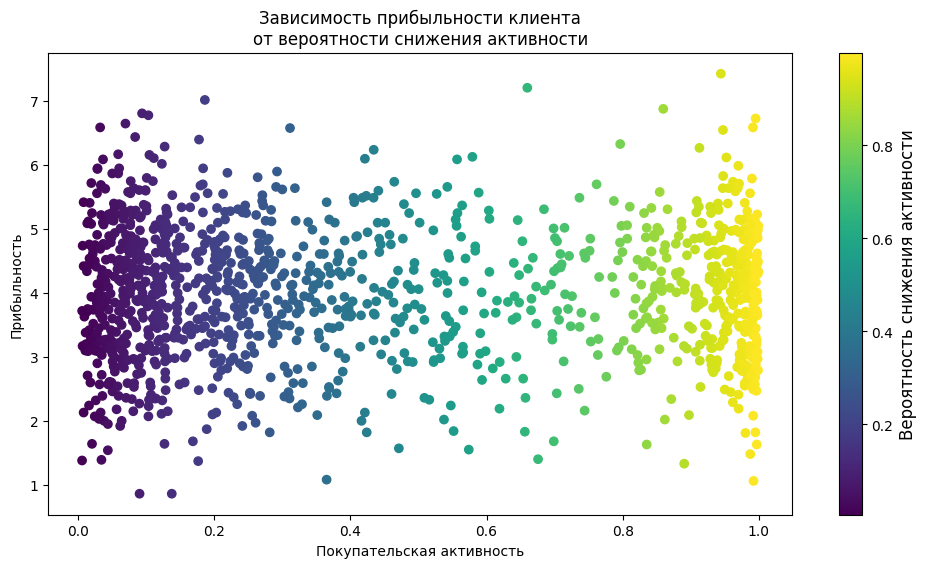

In [106]:
plt.figure(figsize=(12,6))


scatter = plt.scatter(
    x=df['вероятность снижения активности'],
    y=df['прибыль'],
    c=df['вероятность снижения активности'],  
    cmap='viridis'
)

plt.title('Зависимость прибыльности клиента\nот вероятности снижения активности')
plt.xlabel('Покупательская активность')
plt.ylabel('Прибыльность')


cbar = plt.colorbar(scatter)
cbar.set_label('Вероятность снижения активности', fontsize=12)

plt.show()

Имеет смысл проанализировать сегмент покупателей, активность которых, вероятно, снизится, и которые при этом принесли бы ощутимую прибыль. Проведем границу разделения вероятностей на отметке в 0.7, а границу для прибыли на отметке в 3:

In [107]:
segment = df[(df['вероятность снижения активности'] >= 0.7) & (df['прибыль'] >= 3)]

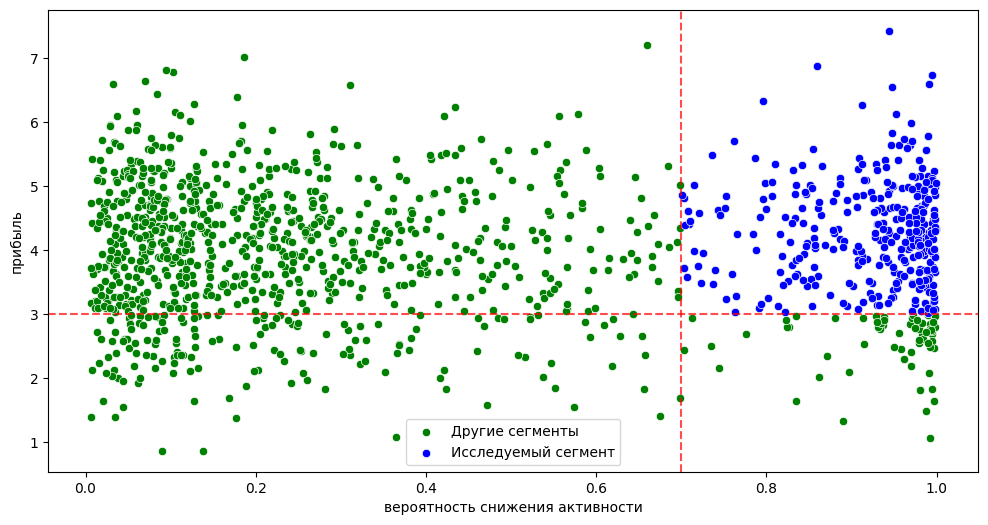

In [108]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='вероятность снижения активности', y='прибыль', label='Другие сегменты', color='green')
sns.scatterplot(data=segment, x='вероятность снижения активности', y='прибыль', label='Исследуемый сегмент', color='blue')
plt.legend()
plt.axvline(x=0.7, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
plt.axhline(y=3, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
plt.show()

**Анализ выбранного сегмента**

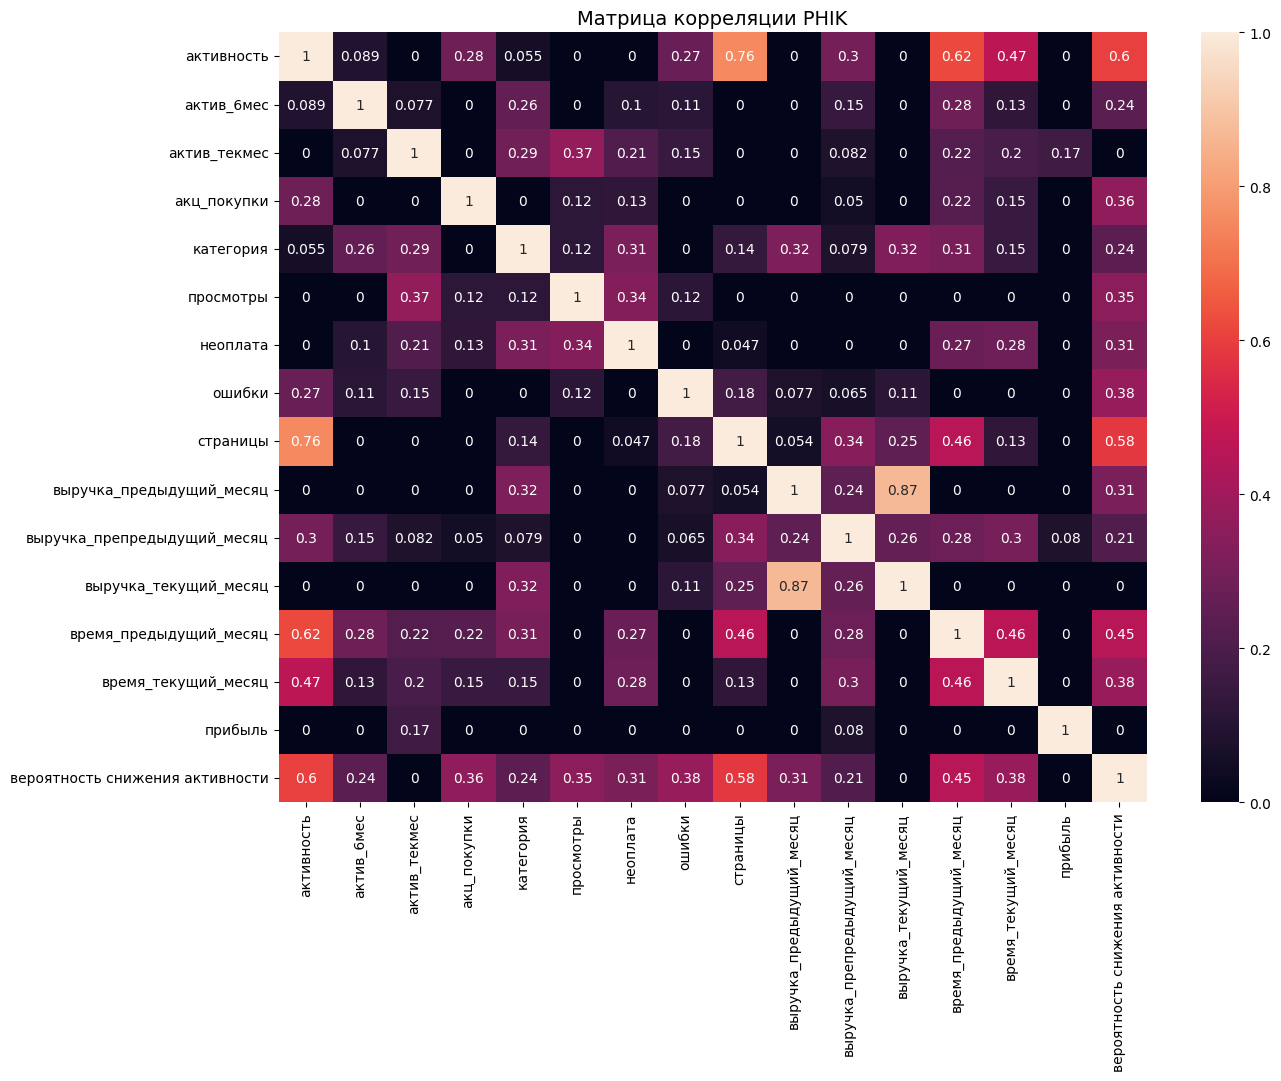

In [109]:
interval_cols = segment.select_dtypes('number').columns.tolist()
phik_overview = segment.phik_matrix(interval_cols=interval_cols)

plt.figure(figsize=(14,10))
sns.heatmap(phik_overview,  annot=True)
plt.title('Матрица корреляции PHIK', fontsize=14)
plt.show()

Из матрицы корреляций видно, что на активность таких пользователей достаточно сильно влияют признаки:

* количество страниц, которые просматривает пользователь
* время, которое он находится на сайте (на основании текущего и предыдущего месяцев)

Выделим среди сегмента группу людей, которая покупает по большей части акционные товары. Затем посмотрим на отличие этой группы от остальных людей

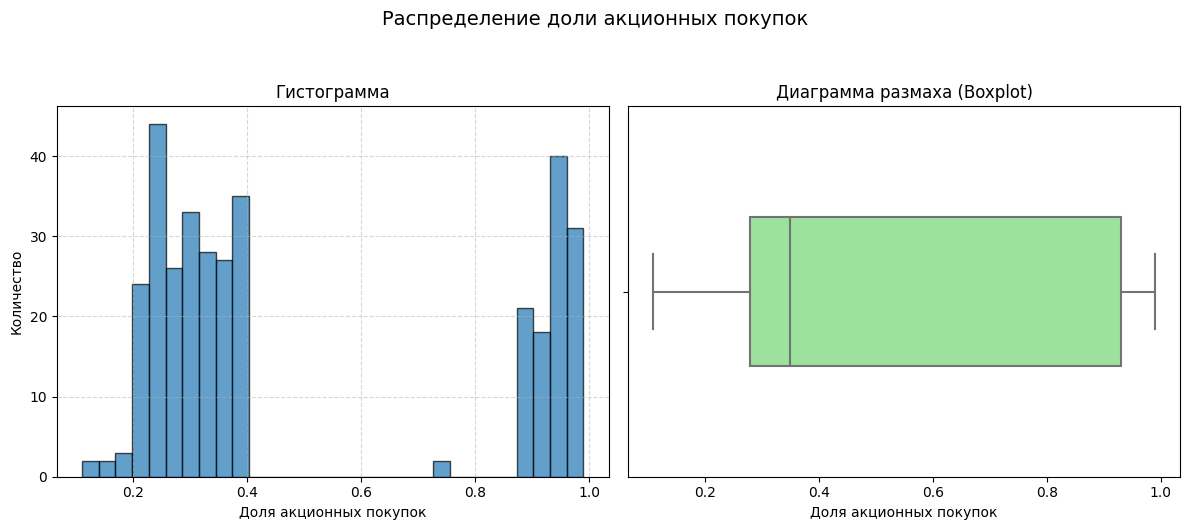

In [110]:
grafics(segment['акц_покупки'], 'Доля акционных покупок', 'Количество', 
       'Распределение доли акционных покупок')

Будем считать, что человек относится к акционной группе, если доля акционных покупок превышает 0.8

C:\Users\user\AppData\Local\Temp\ipykernel_19408\1707742818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment['is_promotion_group'] = segment['акц_покупки'] > 0.8


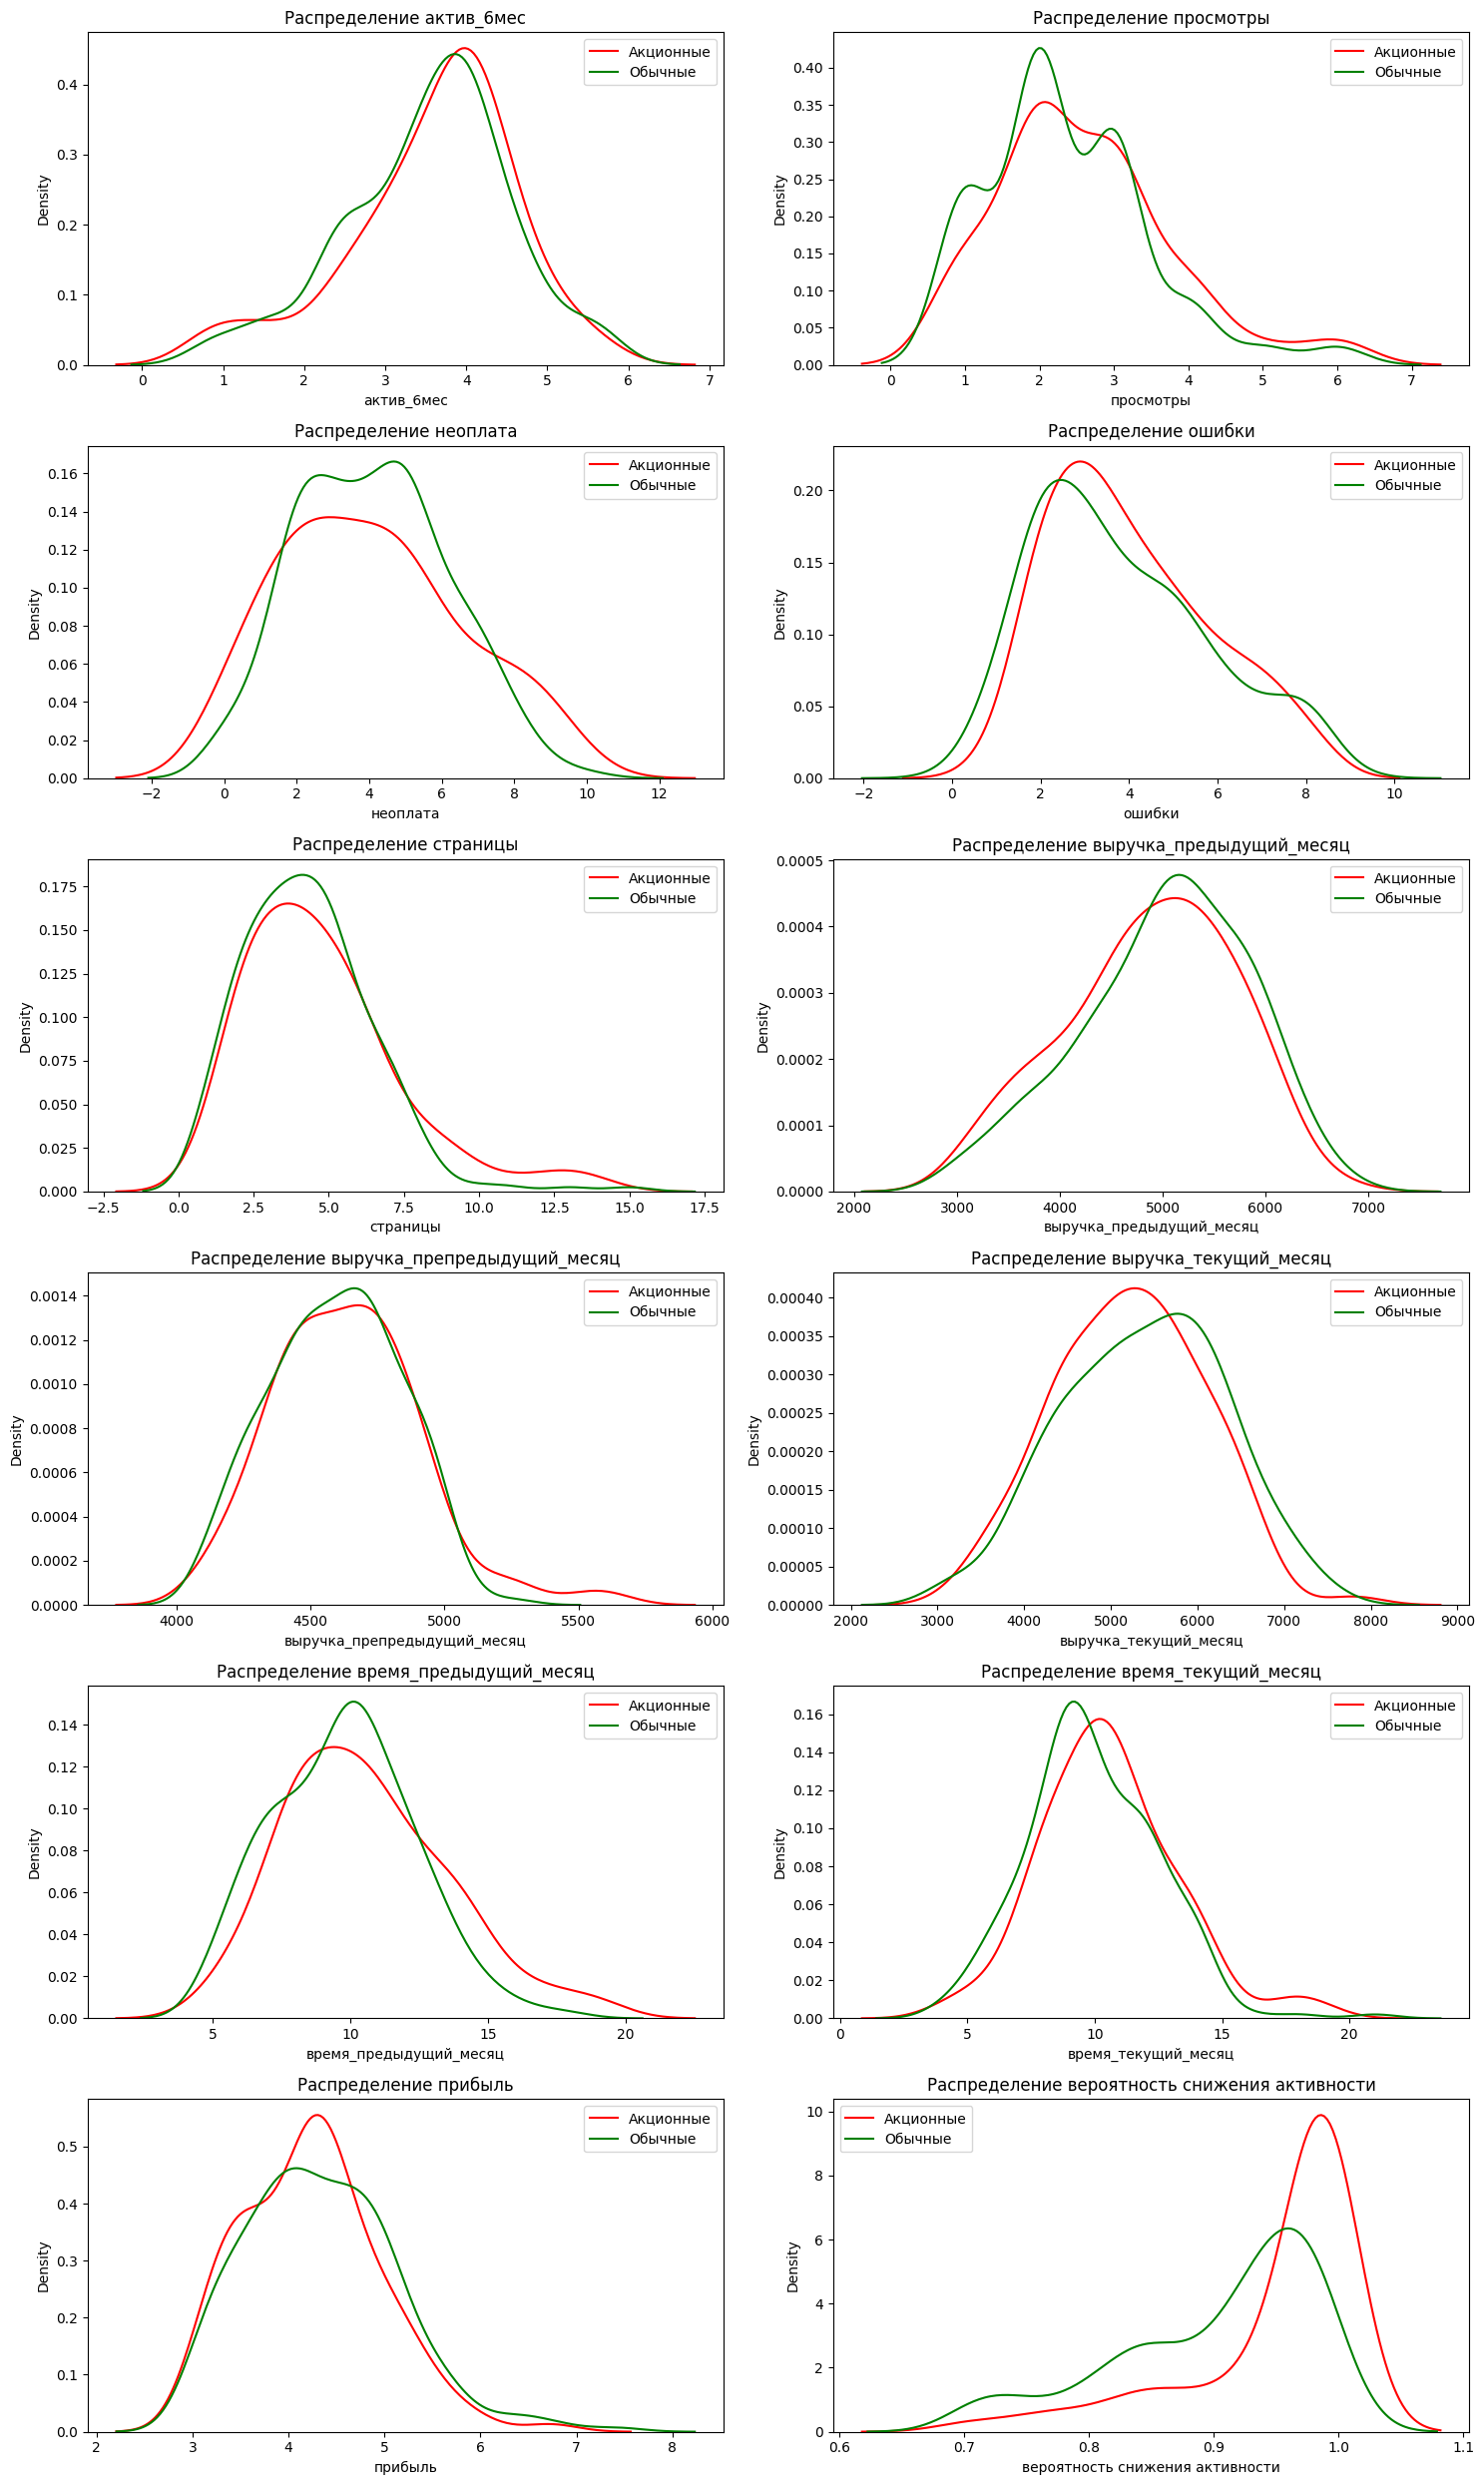

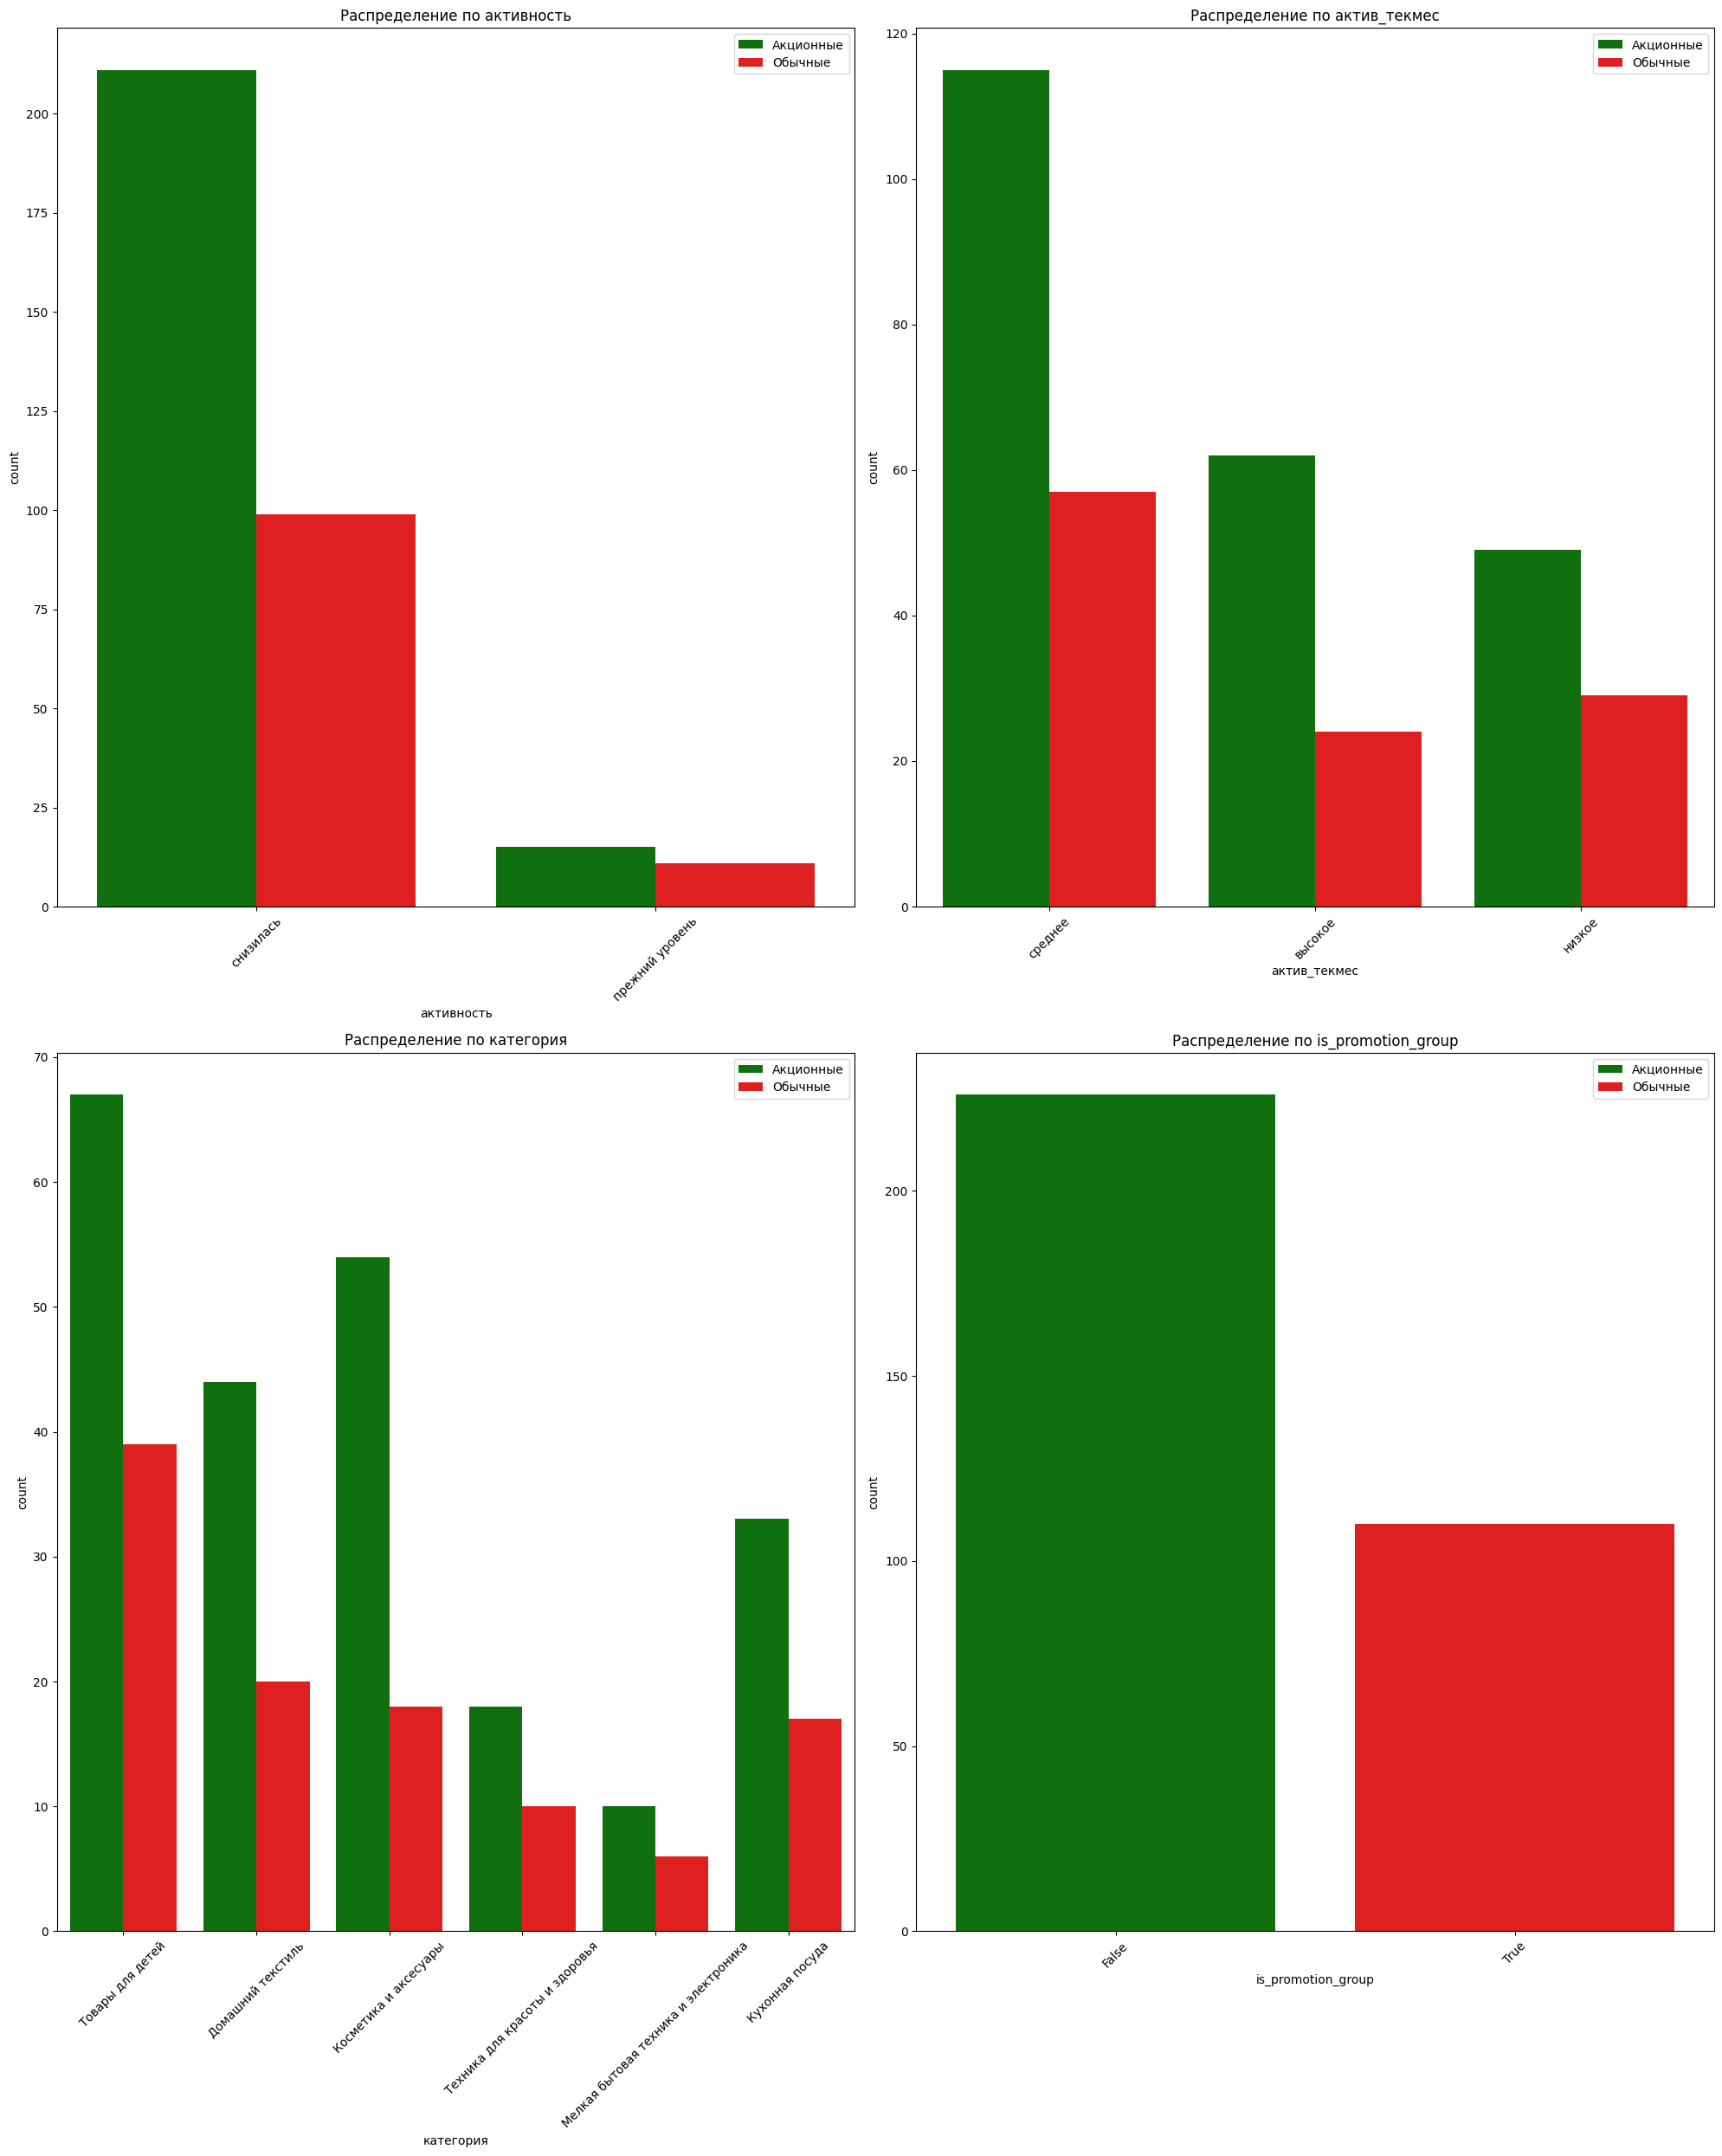

In [111]:
promotion_segment = segment[segment['акц_покупки'] > 0.8].copy()
non_promotion_segment = segment[segment['акц_покупки'] <= 0.8].copy()

# Создаем столбец для группировки
segment['is_promotion_group'] = segment['акц_покупки'] > 0.8

# Числовые и категориальные признаки
num_cols = [col for col in segment.select_dtypes(include='number').columns 
            if col not in ['акц_покупки', 'is_promotion_group']]
cat_cols = segment.select_dtypes(exclude='number').columns.tolist()

# Графики для числовых признаков
plt.figure(figsize=(15, 25))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols)+1)//2, 2, i)
    sns.kdeplot(promotion_segment[col], color='red', label='Акционные')
    sns.kdeplot(non_promotion_segment[col], color='green', label='Обычные')
    plt.title(f'Распределение {col}')
    plt.legend()
plt.tight_layout()
plt.show()

# Графики для категориальных признаков
if cat_cols:
    plt.figure(figsize=(20, 25))
    for i, col in enumerate(cat_cols, 1):
        plt.subplot((len(cat_cols)+1)//2, 2, i)
        sns.countplot(data=segment, x=col, hue='is_promotion_group', 
                     palette={True: 'red', False: 'green'})
        plt.title(f'Распределение по {col}')
        plt.legend(['Акционные', 'Обычные'])
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Категориальные признаки отсутствуют")

**1. Активность пользователей** 

* Акционные покупатели демонстрируют более высокую активность (актив_6мес и актив_текмес), чем неакционные.
* Пик плотности для акционных смещен вправо (большая).

*Вывод: Акционные клиенты вовлечены в поиск акций*
    
**2. Поведение на сайте** 

Просмотры :

* У неакционных пользователей больше просмотров (пик плотности выше).


Страницы :

* Неакционные клиенты просматривают больше страниц за сеанс.

*Вывод: Неакционные чаще исследуют ассортимент, не ограничиваясь акциями.*


**3. Отказ от покупки**

Неоплата :

* У неакционных покупателей чаще случаются отказы от оплаты (остаются товары в корзине).

Вывод: У неакционных пользователей мотивация к покупке менее устойчива.

**4. Прибыль :**

* Более выраженный пик у акционных пользователей

* Но более протяженный правый "хвост" у неакционных

*Вывод: Покупки акционных пользователей предсказуемы, но ограничены в рамках акций*

**Общие рекомендации по работе с сегментами**

**Для акционных покупателей:**

*Персонализированные акционные предложения*

* Разработать систему персональных скидок на часто покупаемые категории товаров

* Внедрить программу "Ранний доступ к акциям" для самых активных покупателей

Повышение вовлеченности

* Внедрить геймификацию (бонусы за ежедневные посещения)

* Создать раздел "Горящие акции" с таймером обратного отсчета

Увеличение среднего чека

* Ввести систему накопительных бонусов за повторные покупки


***Для неакционных покупателей:***


Улучшение пользовательского опыта

* Разработать персонализированные рекомендации на основе истории просмотров

* Упростить процесс оформления заказа для снижения количества отказов

Программа лояльности

* Ввести статусную систему с эксклюзивными условиями для постоянных клиентов

* Предлагать бесплатные услуги (доставка, сборка) вместо скидок

Работа с корзиной

* Настроить автоматические напоминания о неоплаченных заказах

* Предлагать альтернативные варианты при отказе от покупки

### Общий вывод

**Описание задачи**

Для выполнения задачи необходимо сделать:

* Промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».

Собрать данные по клиентам по следующим группам:

* Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
* Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
* Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
* Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.


В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.


Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

**Исходные данные и предобработка**

**Описание данных**


Данные для работы находятся в нескольких таблицах.


**market_file.csv**


Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
* id — номер покупателя в корпоративной базе данных.
* Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
* Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
* Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
* Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
* Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
* Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
* Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
* Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
* Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
* Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
* Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
* Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**market_money.csv**


Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
* id — номер покупателя в корпоративной базе данных.
* Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
* Выручка — сумма выручки за период.


**market_time.csv**


Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
* id — номер покупателя в корпоративной базе данных.
* Период — название периода, во время которого зафиксировано общее время.
* минут — значение времени, проведённого на сайте, в минутах.


**money.csv**


Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
* id — номер покупателя в корпоративной базе данных.
* Прибыль — значение прибыли.

Предобработка данных включала следующие шаги:

* Замена названий столбцов.
* Изменение типов данных.
* Обработка дубликатов.

Кроме того, были проведены исследовательский и корреляционный анализ данных, в процессе которых были преобрахованы некоторые признаки, а также устранены коррелирующие.

**Поиск лучшей модели**

В процессе поиска лучшей модели с помощью инструмента RandomizedSearchCV были обучены следующие модели с разными параметрами:

* KNeighborsClassifier();
* DecisionTreeClassifier();
* LogisticRegression();
* SVC().

Были перебраны различные методы подготовки данных (OneHotEncoder, OdrinalEncoder, StandardScaler, MinMaxScaler)




In [112]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                      

In [113]:
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Метрика лучшей модели на тренировочной выборке: 0.897001144119326
Метрика ROC-AUC на тестовой выборке: 0.9160700562229502


**Выводы и рекомендации**

В ходе работы среди сегмента была выделена группа людей, которая покупает по большей части акционные товары. Затем было проанализировано отличие этой группы от остальных людей. Были сделаны следующие выводы для удержания покупателей:

***1. Персонализация маркетинга***

**Сегментированные рассылки:**

* Для акционных покупателей — упор на скидки и ограниченные предложения.

* Для неакционных — акцент на эксклюзивность, новинки и сервис.

**Рекомендательные системы:**

* Внедрить AI-алгоритмы для подбора товаров на основе истории просмотров и покупок.

***2. Оптимизация работы с ключевыми категориями***

**Мелкая техника и электроника:**

* Регулярно обновлять ассортимент.

* Ввести «подписку на новинки» для ценителей технологий.

**Товары для красоты и здоровья:**

* Создать тематические подборки («Топ-5 товаров для ухода за кожей»).

* Добавить видеообзоры от экспертов.

***3. Улучшение поведенческих метрик***

**Снижение отказов от корзины:**

* Добавить кнопку «Забронировать» (без оплаты) для неакционных клиентов.

* Для акционных — pop-up с дополнительной скидкой при отказе.

**Повышение вовлеченности:**

* Внедрить «дневные задания» (например, «Посмотри 3 товара — получи 100 бонусов»).